In [58]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth

In [59]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM2
#CanESM2_ens = xr.open_dataset(path2+'CanESM2/pr_Amon_CanESM2_historical_ensmean_197601-200512_2.5_mes.nc')

#Abro CanESM5
CanESM5_ens = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_historical_ensmean1p1f1_2.5_mes.nc')

In [60]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM2 horizonte 1
CanESM5_ens_h1 = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5_mes.nc')

#Abro CanESM2 horizonte 2
CanESM5_ens_h2 = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_ssp585_ensmeani1p2f1_2070-2099_2.5_mes.nc')

In [61]:

#Monzón HS
def annual_range_HS(dato):
    verano = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano

#Monzón HN
def annual_range_HN(dato):
    verano = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano


## Monzon range y mascara para historical y los dos horizontes

In [62]:
mon_range_CanESM5_HS, p_verano_HS = annual_range_HS(CanESM5_ens)
monzon_range_HS = (mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)/mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)) * p_verano_HS.where(p_verano_HS > .35)

mon_range_CanESM5_HN, p_verano_HN = annual_range_HN(CanESM5_ens)
monzon_range_HN = (mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)/mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)) * p_verano_HN.where(p_verano_HN > .35)

monzon_mask_HS = (mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)/mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)) * (p_verano_HS.where(p_verano_HS > .35)/p_verano_HS.where(p_verano_HS > .35))
monzon_mask_HS = monzon_mask_HS.where(monzon_mask_HS.lat < 0)
monzon_mask_HN = (mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)/mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)) * (p_verano_HN.where(p_verano_HN > .35)/p_verano_HN.where(p_verano_HN > .35))
monzon_mask_HN = monzon_mask_HN.where(monzon_mask_HN.lat > 0)

In [63]:
mon_range_CanESM5_HS_h1, p_verano_HS_h1 = annual_range_HS(CanESM5_ens_h1)
monzon_range_HS_h1 = (mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)/mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)) * p_verano_HS_h1.where(p_verano_HS_h1 > .35)

mon_range_CanESM5_HN_h1, p_verano_HN_h1 = annual_range_HN(CanESM5_ens_h1)
monzon_range_HN_h1 = (mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)/mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)) * p_verano_HN_h1.where(p_verano_HN_h1 > .35)

monzon_mask_HS_h1 = (mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)/mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)) * (p_verano_HS_h1.where(p_verano_HS_h1 > .35)/p_verano_HS_h1.where(p_verano_HS_h1 > .35))
monzon_mask_HN_h1 = (mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)/mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)) * (p_verano_HN_h1.where(p_verano_HN_h1 > .35)/p_verano_HN_h1.where(p_verano_HN_h1 > .35))
monzon_mask_HS_h1 = monzon_mask_HS_h1.where(monzon_mask_HS_h1.lat < 0)
monzon_mask_HN_h1 = monzon_mask_HN_h1.where(monzon_mask_HN_h1.lat > 0)

In [64]:
mon_range_CanESM5_HS_h2, p_verano_HS_h2 = annual_range_HS(CanESM5_ens_h2)
monzon_range_HS_h2 = (mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)/mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)) * p_verano_HS_h2.where(p_verano_HS_h2 > .35)

mon_range_CanESM5_HN_h2, p_verano_HN_h2 = annual_range_HN(CanESM5_ens_h2)
monzon_range_HN_h2 = (mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)/mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)) * p_verano_HN_h2.where(p_verano_HN_h2 > .35)

monzon_mask_HS_h2 = (mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)/mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)) * (p_verano_HS_h2.where(p_verano_HS_h2 > .35)/p_verano_HS_h2.where(p_verano_HS_h2 > .35))
monzon_mask_HN_h2 = (mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)/mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)) * (p_verano_HN_h2.where(p_verano_HN_h2 > .35)/p_verano_HN_h2.where(p_verano_HN_h2 > .35))
monzon_mask_HS_h2 = monzon_mask_HS_h2.where(monzon_mask_HS_h2.lat < 0)
monzon_mask_HN_h2 = monzon_mask_HN_h2.where(monzon_mask_HN_h2.lat > 0)

In [65]:


def mapa(dato1,dato2,titulo):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    #ax1.set_extent([275,335, 10, -60], crs=data_crs)
    clevels = np.arange(0,12,2)
    levels1 = [dato1.min(),.4,dato1.max()]
    ax1.contourf(cyclic_lons, lat, dato1,levels1, transform=data_crs,levels=levels1, hatches=["", "..."], alpha=0.001)
    levels2 = [dato2.min(),.4,dato2.max()]
    ax1.contourf(cyclic_lons, lat, dato2,levels2, transform=data_crs,levels=levels2, hatches=["", "..."], alpha=.001)
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    #colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.655, x=0.5,fontsize=20)
    return fig


In [66]:
lon = np.arange(0, 362, 362/144)
lat = CanESM5_ens.lat
HS_2 = monzon_mask_HS_h2*p_verano_HS_h2
#HS_2 = HS.where(HS.lat < 0)
HN_2 = monzon_mask_HN_h2*p_verano_HN_h2
#HN_2 = HN.where(HN.lat > 0)
cyclic_HS_h2, cyclic_lons = add_cyclic_point(HS_2, coord=lon)
cyclic_HN_h2, cyclic_lons = add_cyclic_point(HN_2, coord=lon)

HS_1 = monzon_mask_HS_h1*p_verano_HS_h1
#HS_1 = HS.where(HS.lat < 0)
HN_1 = monzon_mask_HN_h1*p_verano_HN_h1
#HN_1 = HN.where(HN.lat > 0)
cyclic_HS_h1, cyclic_lons = add_cyclic_point(HS_1, coord=lon)
cyclic_HN_h1, cyclic_lons = add_cyclic_point(HN_1, coord=lon)

HS = monzon_mask_HS*p_verano_HS
#HS = HS.where(HS.lat < 0)
HN = monzon_mask_HN*p_verano_HN
#HN = HN.where(HN.lat > 0)
cyclic_HS, cyclic_lons = add_cyclic_point(HS, coord=lon)
cyclic_HN, cyclic_lons = add_cyclic_point(HN, coord=lon)


/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
Ille

Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Poi

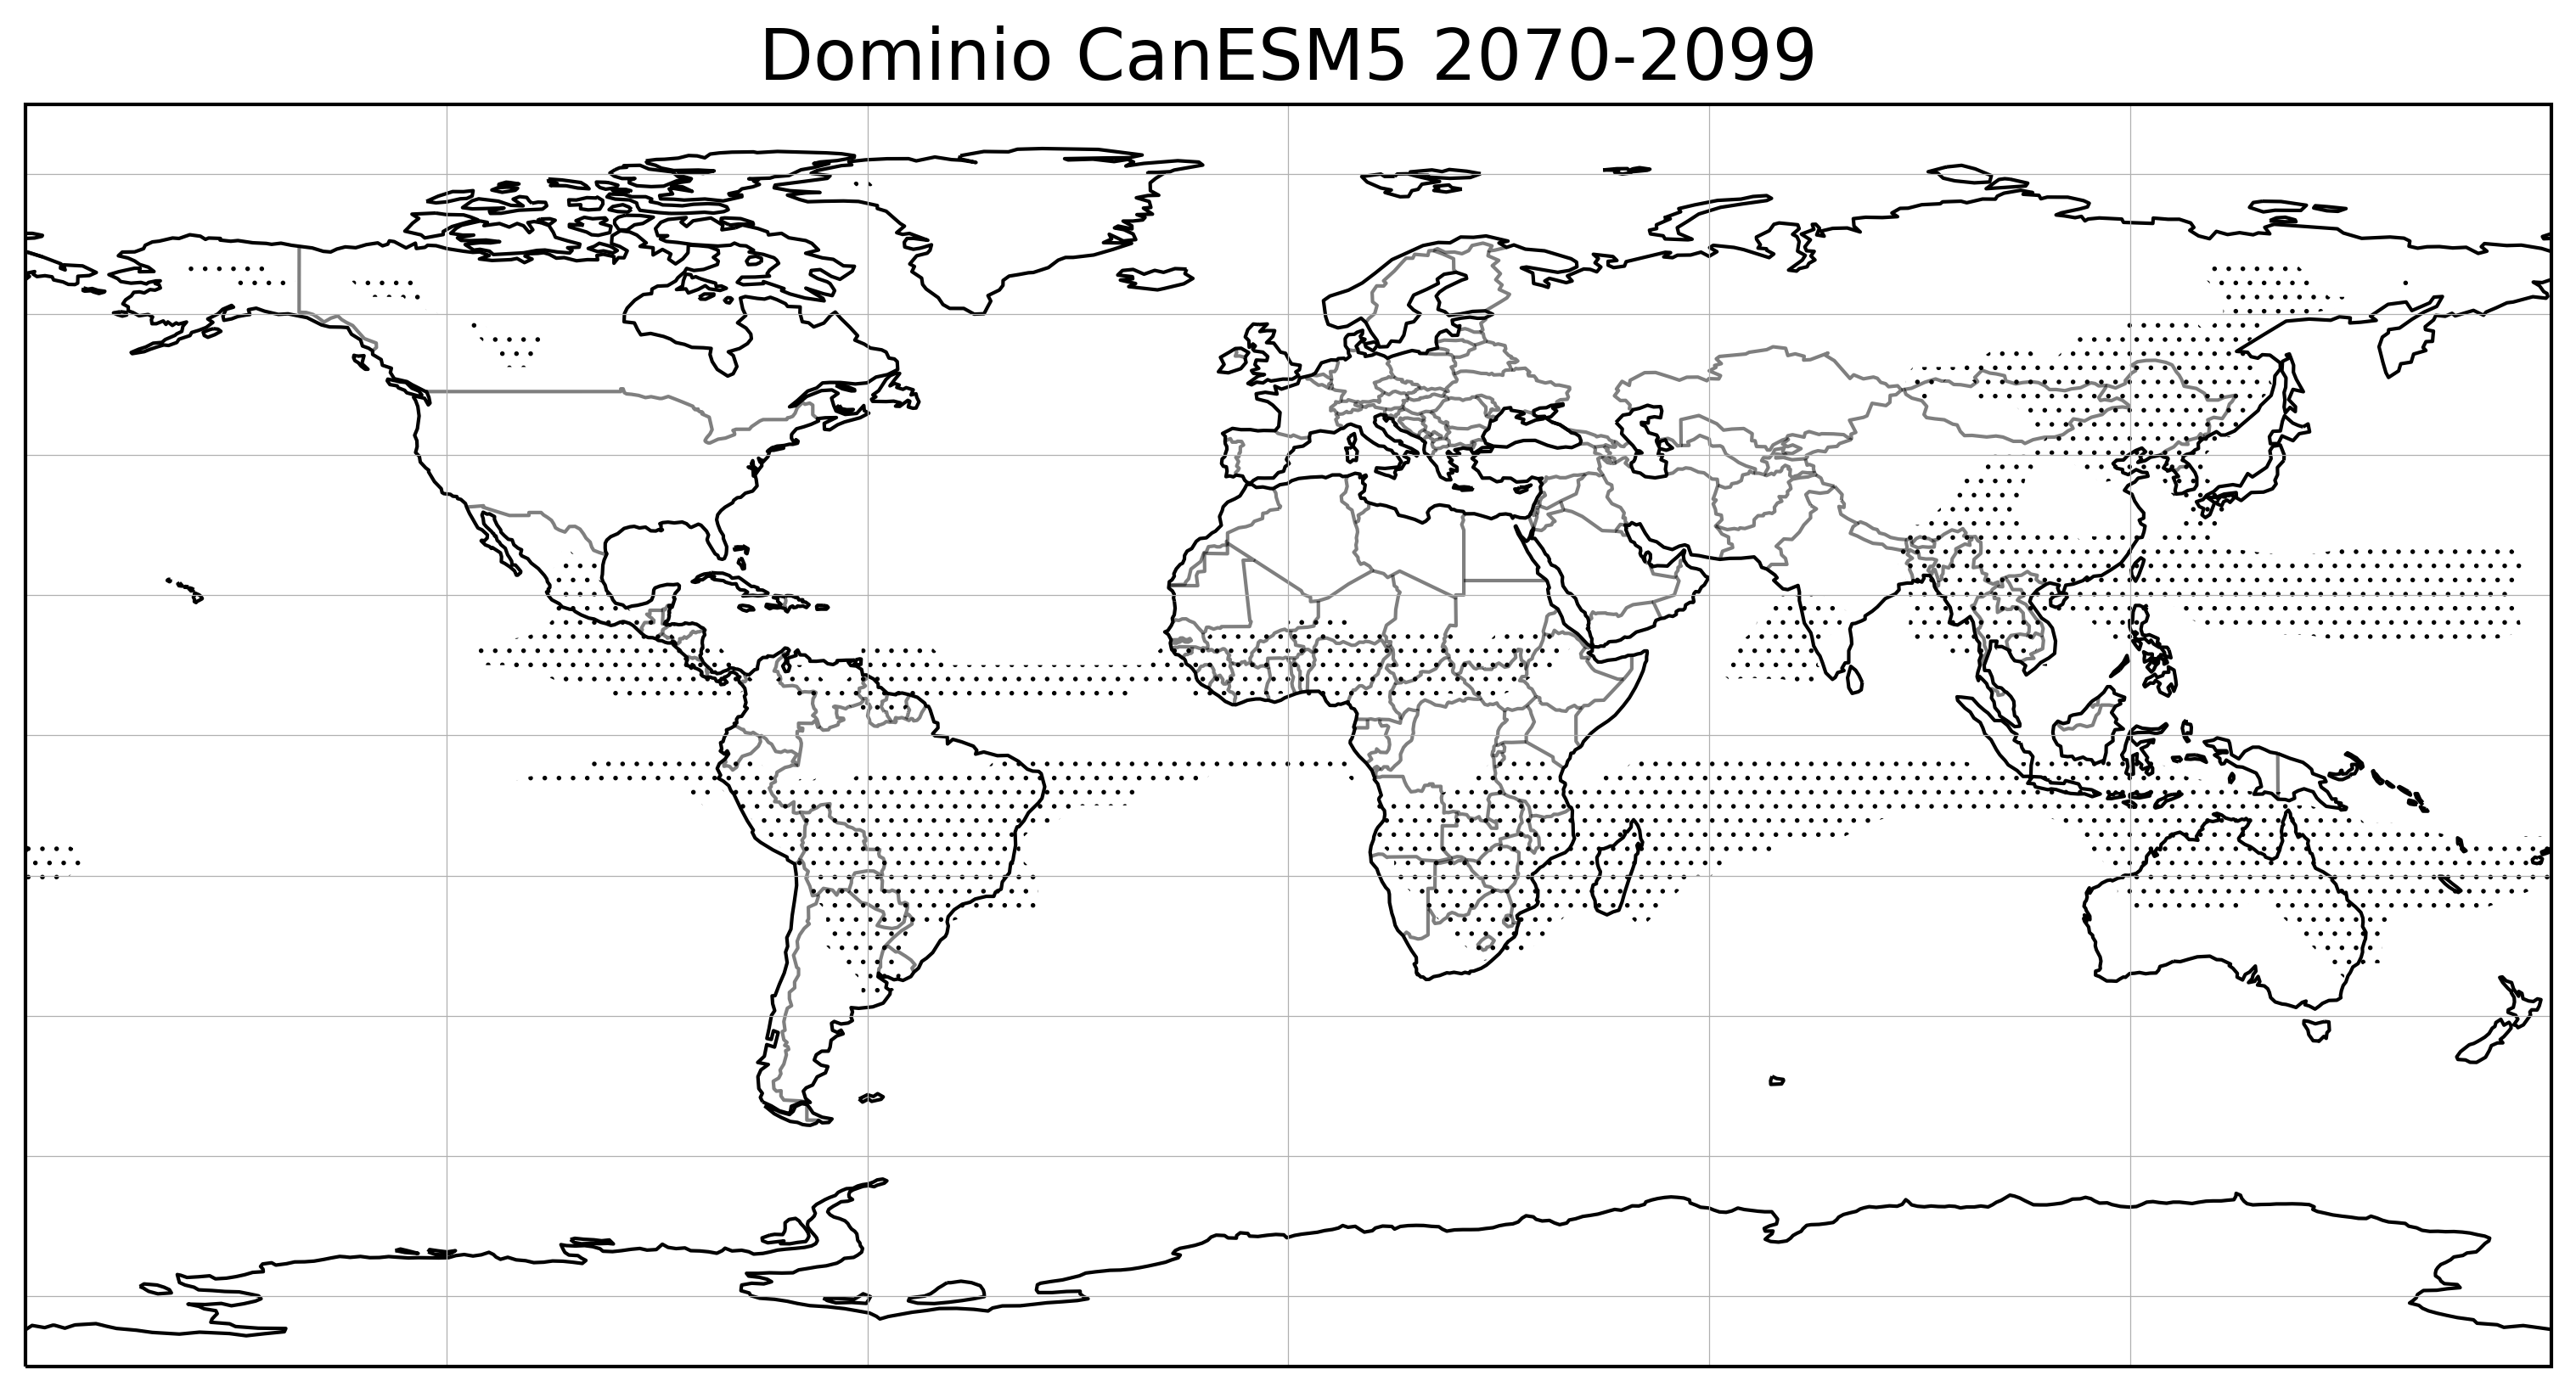

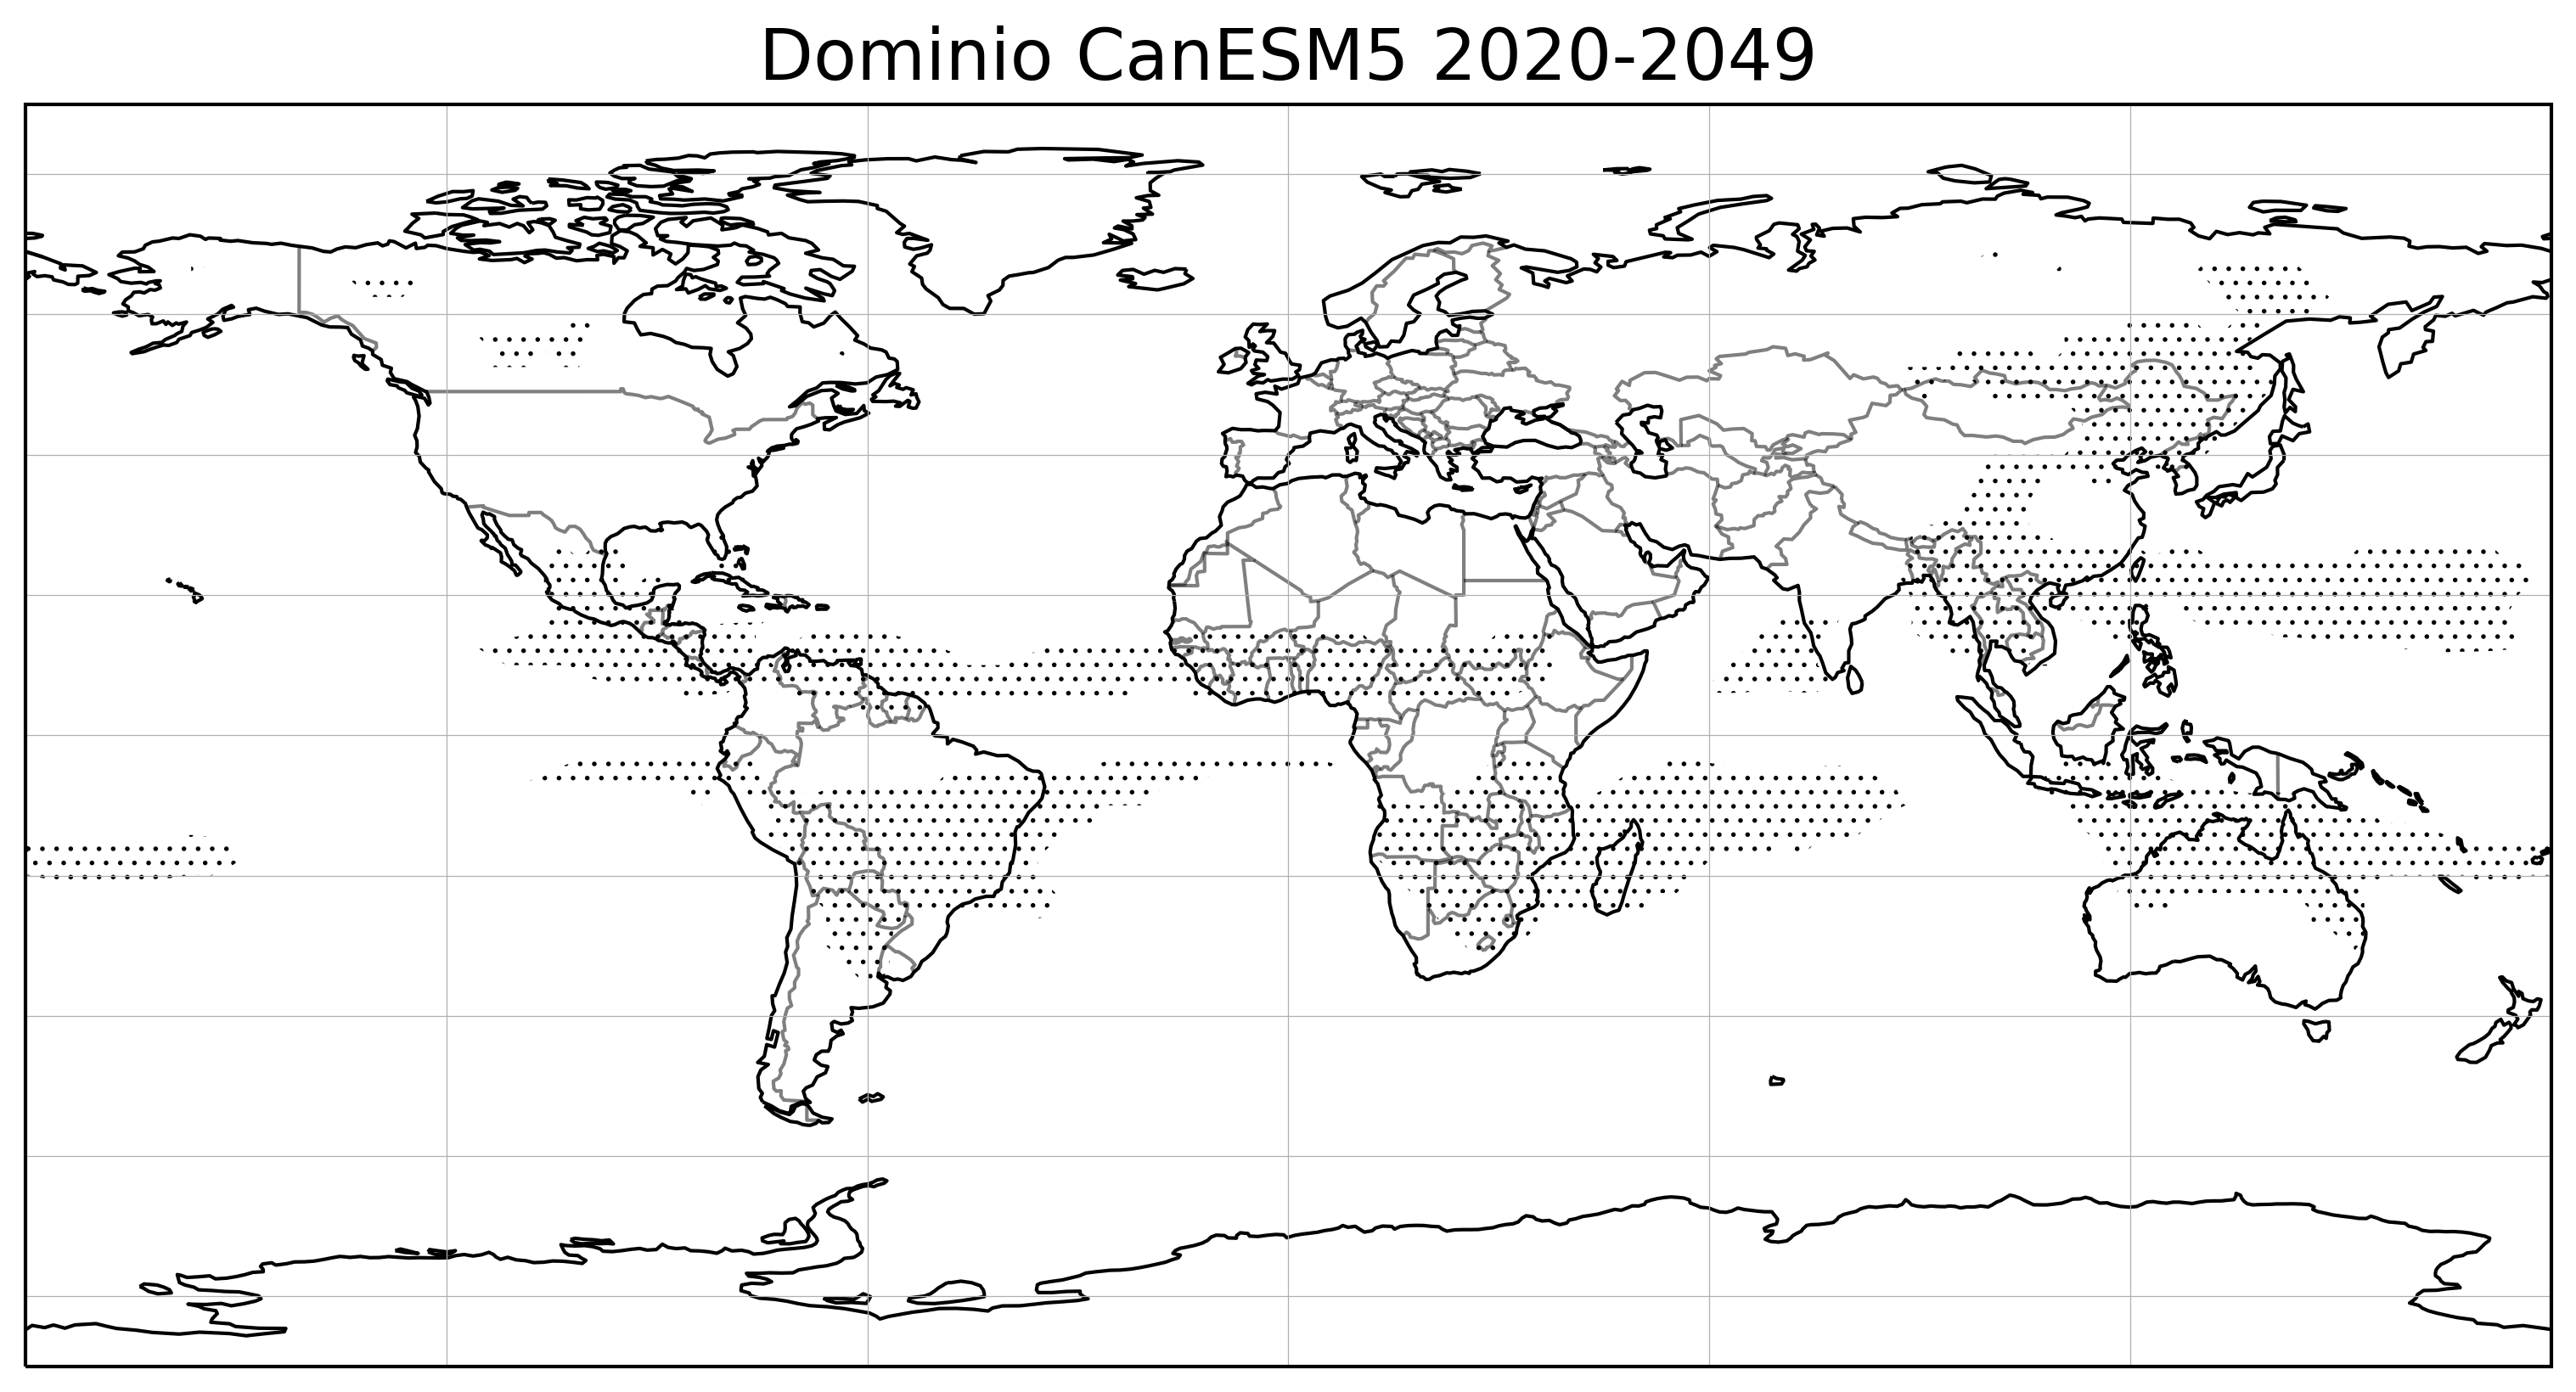

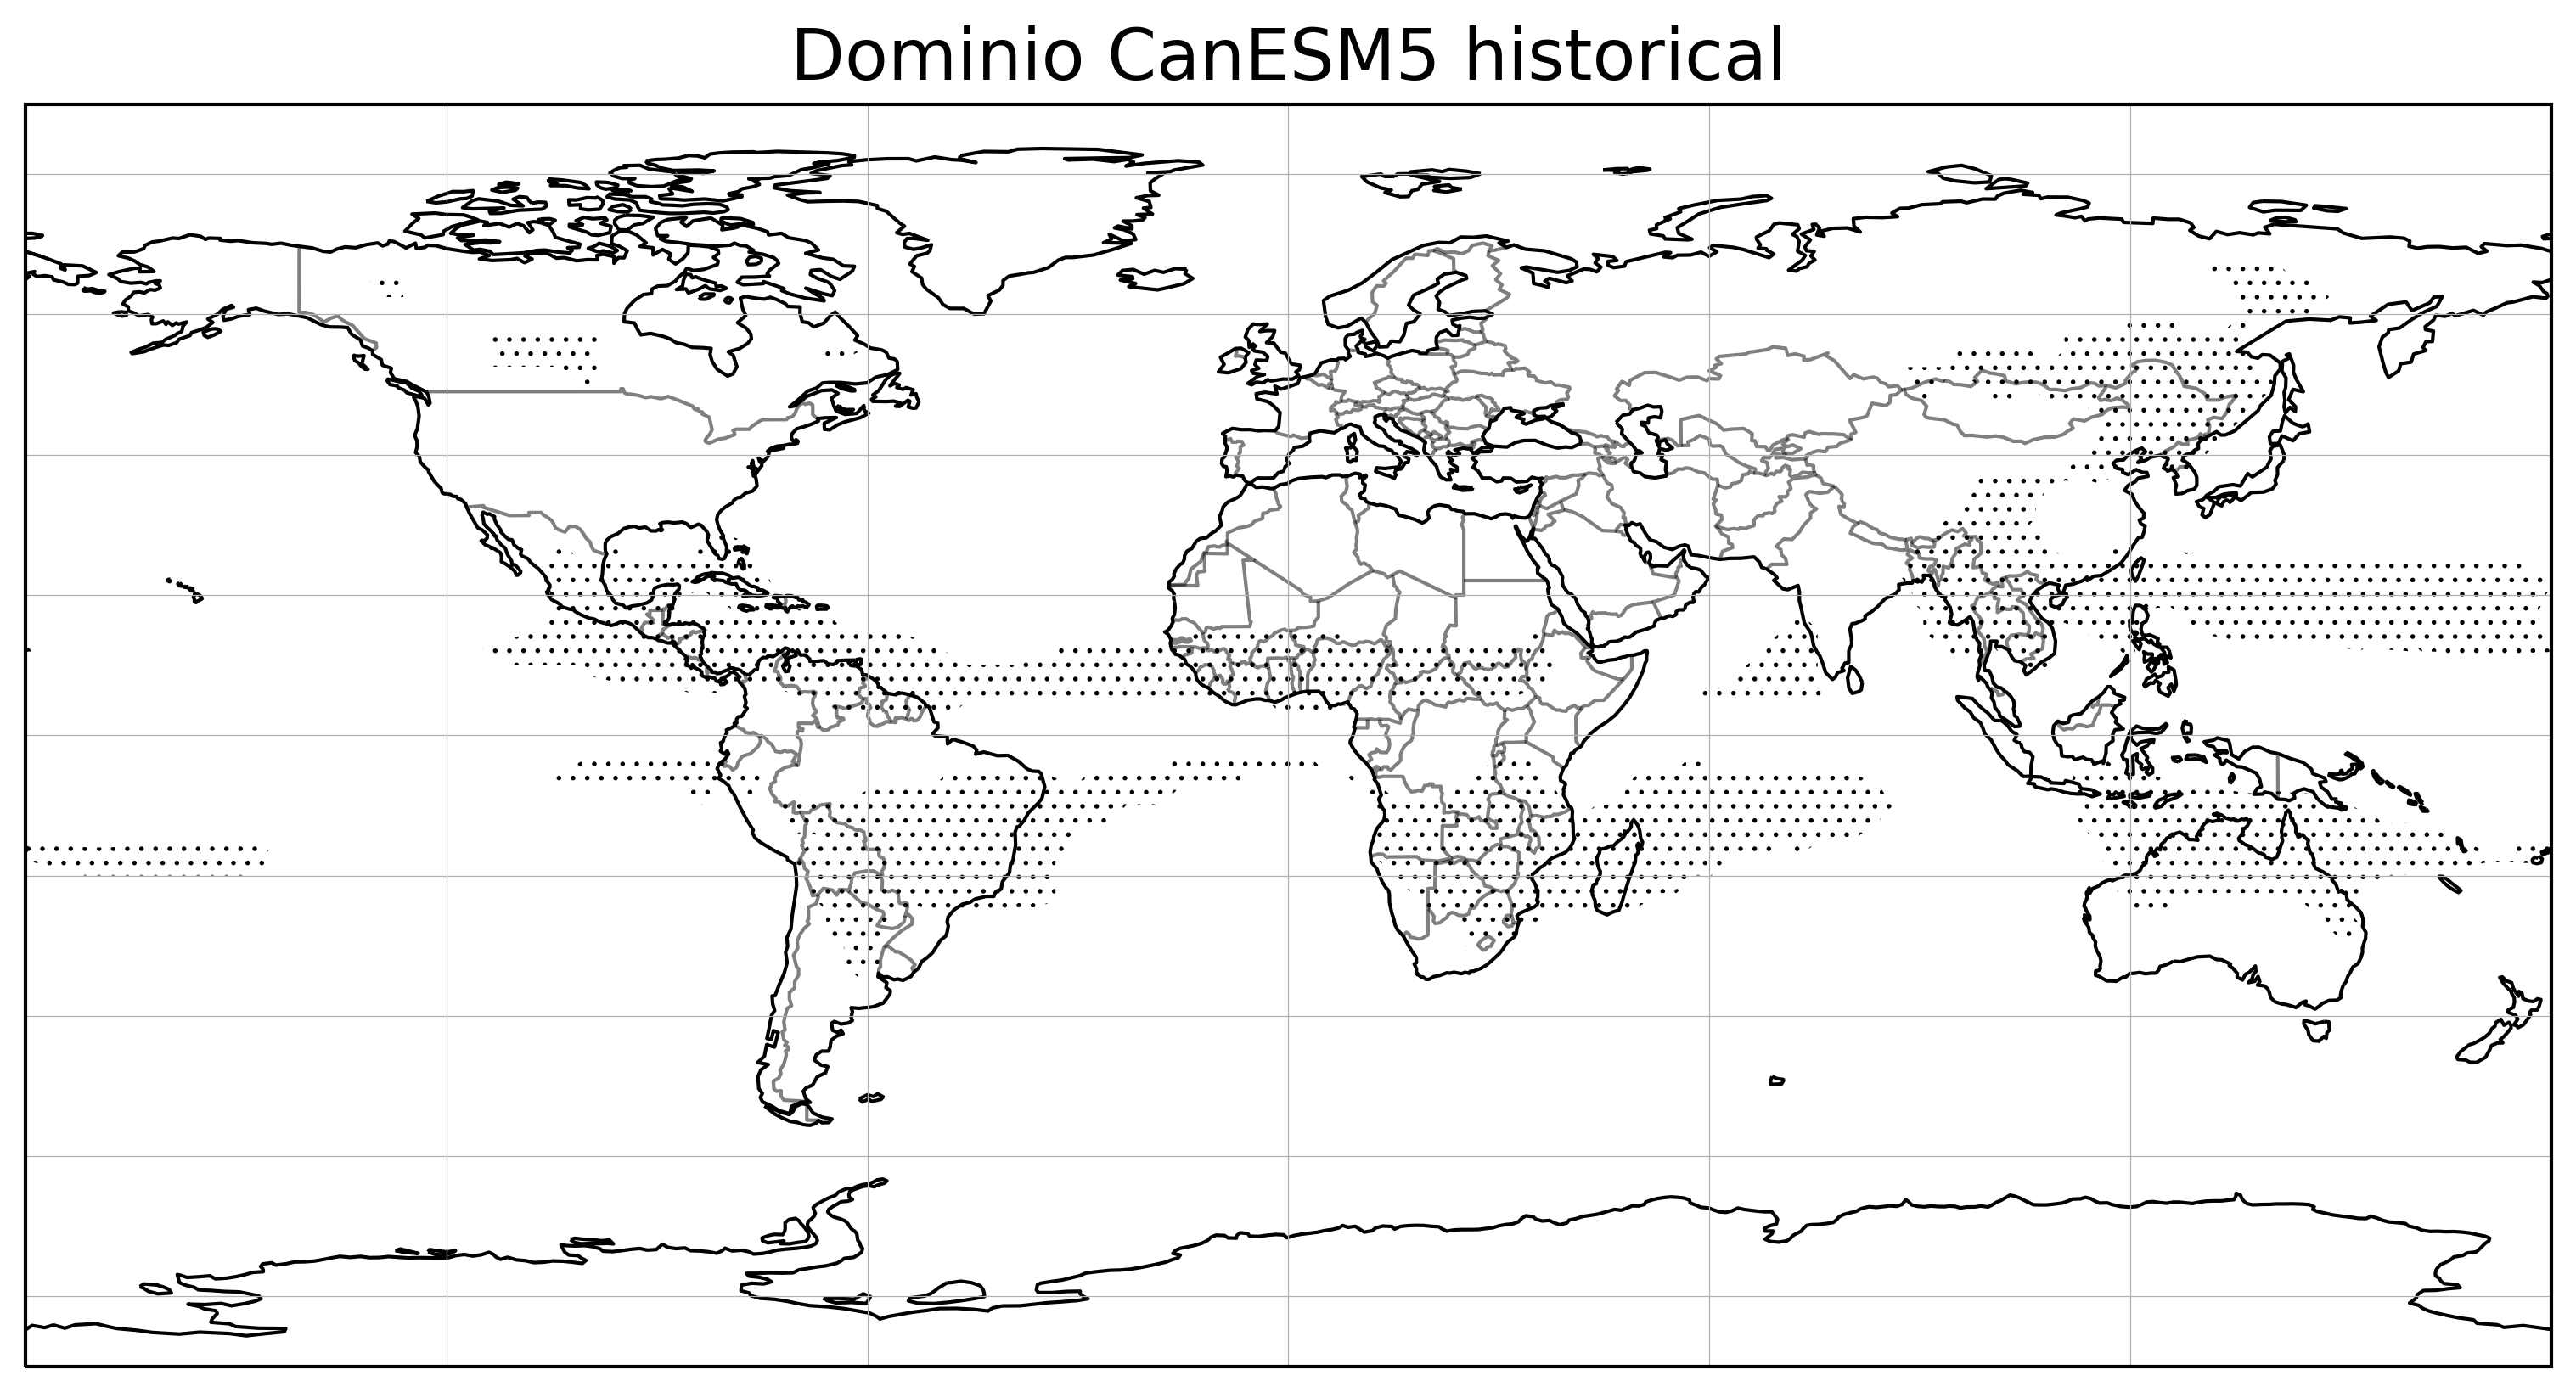

In [67]:
titulo = 'Dominio CanESM5 2070-2099'
clevels = np.arange(0,5,10)
figura = mapa(cyclic_HS_h2,cyclic_HN_h2,titulo)

titulo = 'Dominio CanESM5 2020-2049'
clevels = np.arange(0,5,10)
figura = mapa(cyclic_HS_h1,cyclic_HN_h1,titulo)

titulo = 'Dominio CanESM5 historical'
clevels = np.arange(0,5,10)
figura = mapa(cyclic_HS,cyclic_HN,titulo)

## Precipitacion anual en areas monzónicas

In [68]:
#Genero un mapa para la precipitacion 
def mapa_colores(dato1,dato2,titulo,clevels):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    clevels = clevels
    im1=ax1.contourf(cyclic_lons, lat, dato1,clevels,transform=data_crs,cmap='Blues',extend='both')
    im1=ax1.contourf(cyclic_lons, lat, dato2,clevels,transform=data_crs,cmap='Blues',extend='both')
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #ax1.set_title('Annual range')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.66, x=0.5,fontsize=20)
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('verano [mm/mes] ',fontsize=20)
    return fig


In [69]:
HS_monson = CanESM5_ens.pr*monzon_mask_HS
HS_hist = HS_monson.sel(time=HS_monson['time.season']=='DJF').mean(dim='time')
cyclic_data_HS, cyclic_lons = add_cyclic_point(HS_hist, coord=lon)
HN_monson = CanESM5_ens.pr*monzon_mask_HN
HN_hist = HN_monson.sel(time=HN_monson['time.season']=='JJA').mean(dim='time')
cyclic_data_HN, cyclic_lons = add_cyclic_point(HN_hist, coord=lon) #+HS_hist.fillna(0.)

/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [70]:
titulo = 'precipitacion verano Dominio monzón CanESM5 historical'
clevels = np.arange(0,500,50)
cyclic_data_HN[np.isnan(cyclic_data_HN)]=0
Intensidad = np.sum(cyclic_data_HN) 
Area = np.sum(cyclic_data_HN/cyclic_data_HN)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

217.09622

In [71]:
cyclic_data_HS[np.isnan(cyclic_data_HS)]=0
Intensidad = np.sum(cyclic_data_HS) 
Area = np.sum(cyclic_data_HS/cyclic_data_HS)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

239.48793

/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


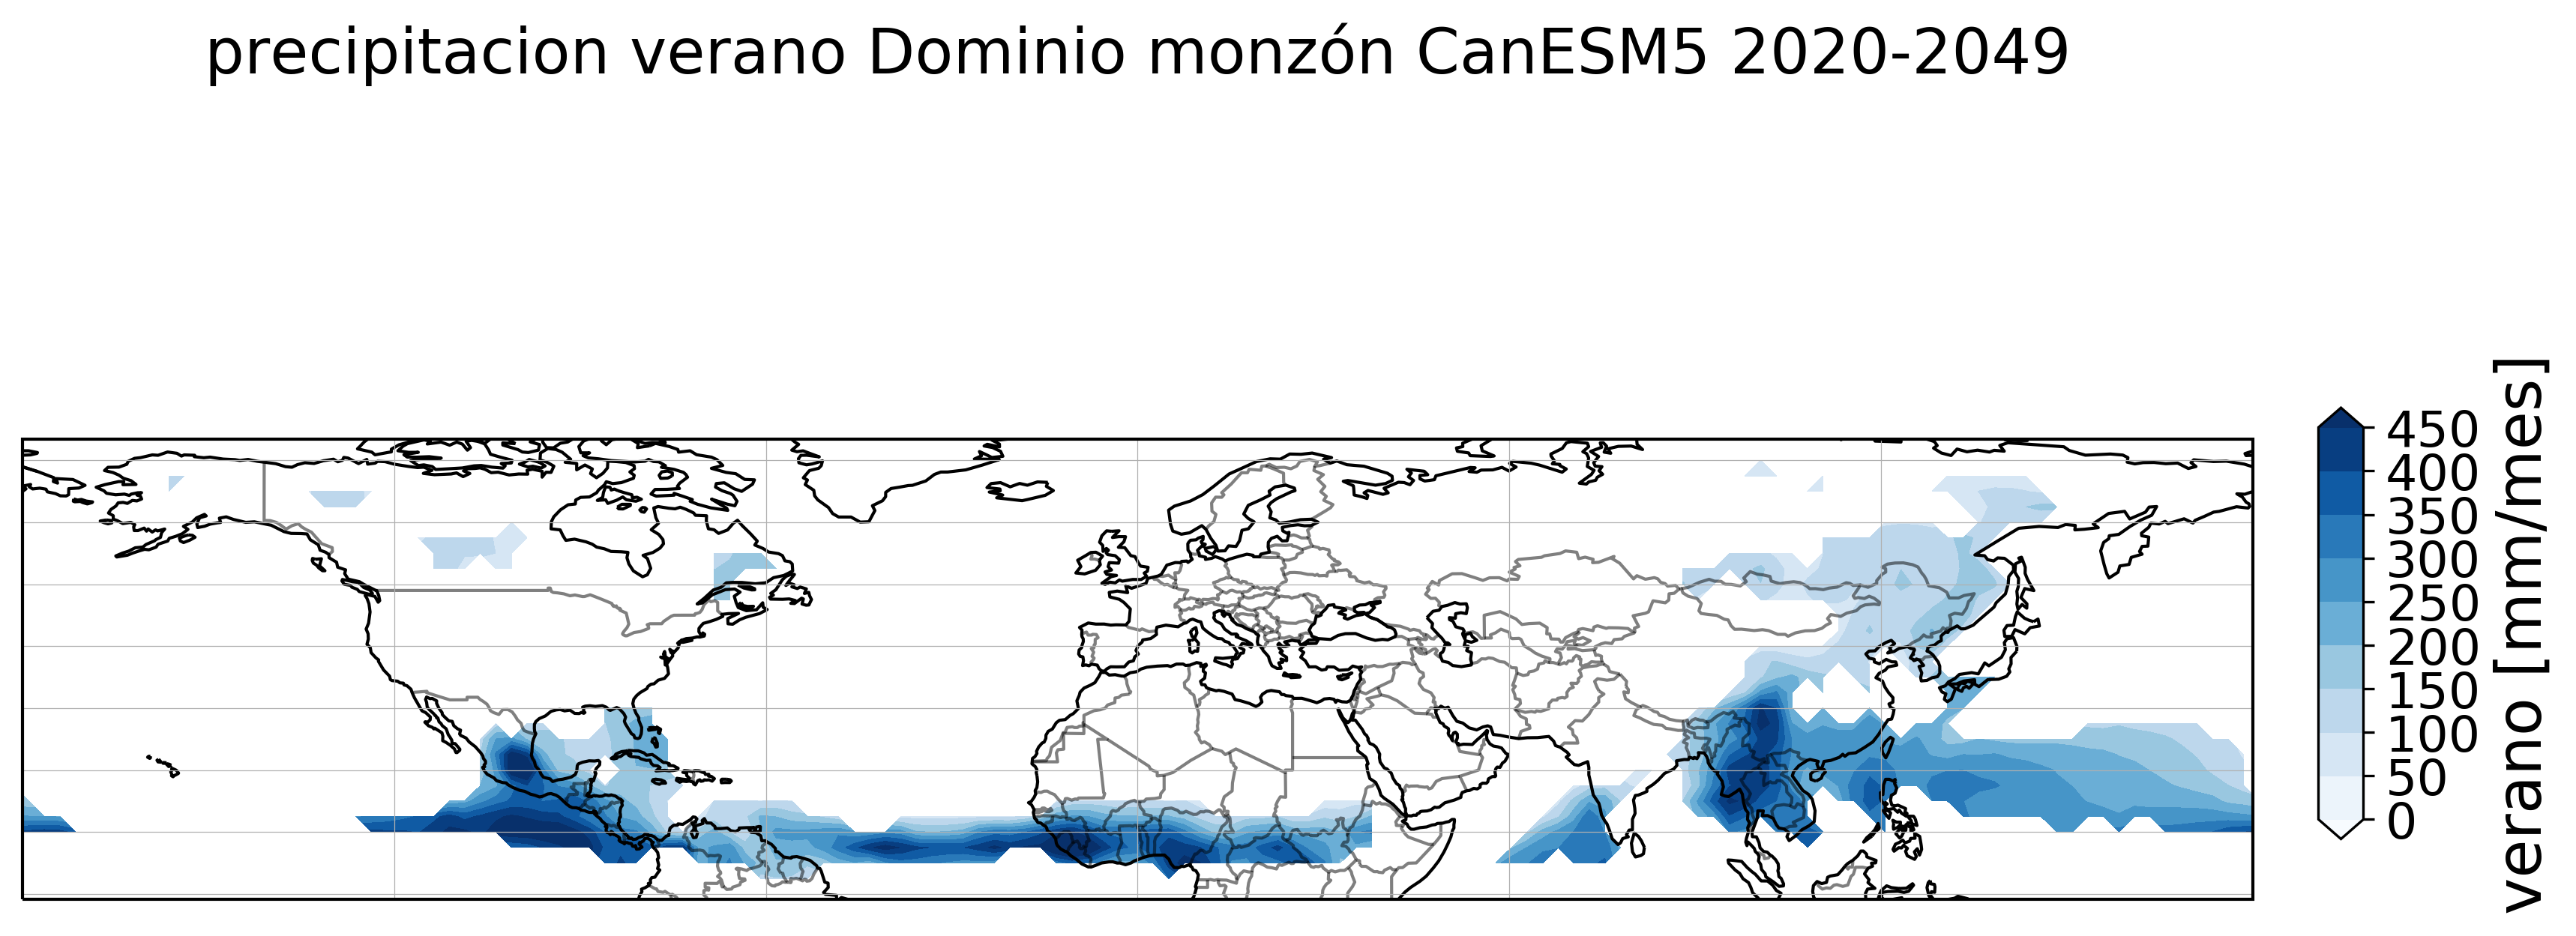

In [72]:
HS_monson_h1 = CanESM5_ens_h1.pr*monzon_mask_HS_h1
HS_hist_h1 = HS_monson_h1.sel(time=HS_monson_h1['time.season']=='DJF').mean(dim='time')
cyclic_data_HS_h1, cyclic_lons = add_cyclic_point(HS_hist_h1, coord=lon)
HN_monson_h1 = CanESM5_ens_h1.pr*monzon_mask_HN_h1
HN_hist_h1 = HN_monson_h1.sel(time=HN_monson_h1['time.season']=='JJA').mean(dim='time')
cyclic_data_HN_h1, cyclic_lons = add_cyclic_point(HN_hist_h1, coord=lon)#+HS_hist_h1.fillna(0.)

titulo = 'precipitacion verano Dominio monzón CanESM5 2020-2049'
clevels = np.arange(0,500,50)
figura = mapa_colores(cyclic_data_HS_h1,cyclic_data_HN_h1,titulo,clevels)

In [73]:
cyclic_data_HS_h1[np.isnan(cyclic_data_HS_h1)]=0
Intensidad = np.sum(cyclic_data_HS_h1) 
Area = np.sum(cyclic_data_HS_h1/cyclic_data_HS_h1)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

240.55727

In [74]:
cyclic_data_HN_h1[np.isnan(cyclic_data_HN_h1)]=0
Intensidad = np.sum(cyclic_data_HN_h1) 
Area = np.sum(cyclic_data_HN_h1/cyclic_data_HN_h1)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

220.9523

/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


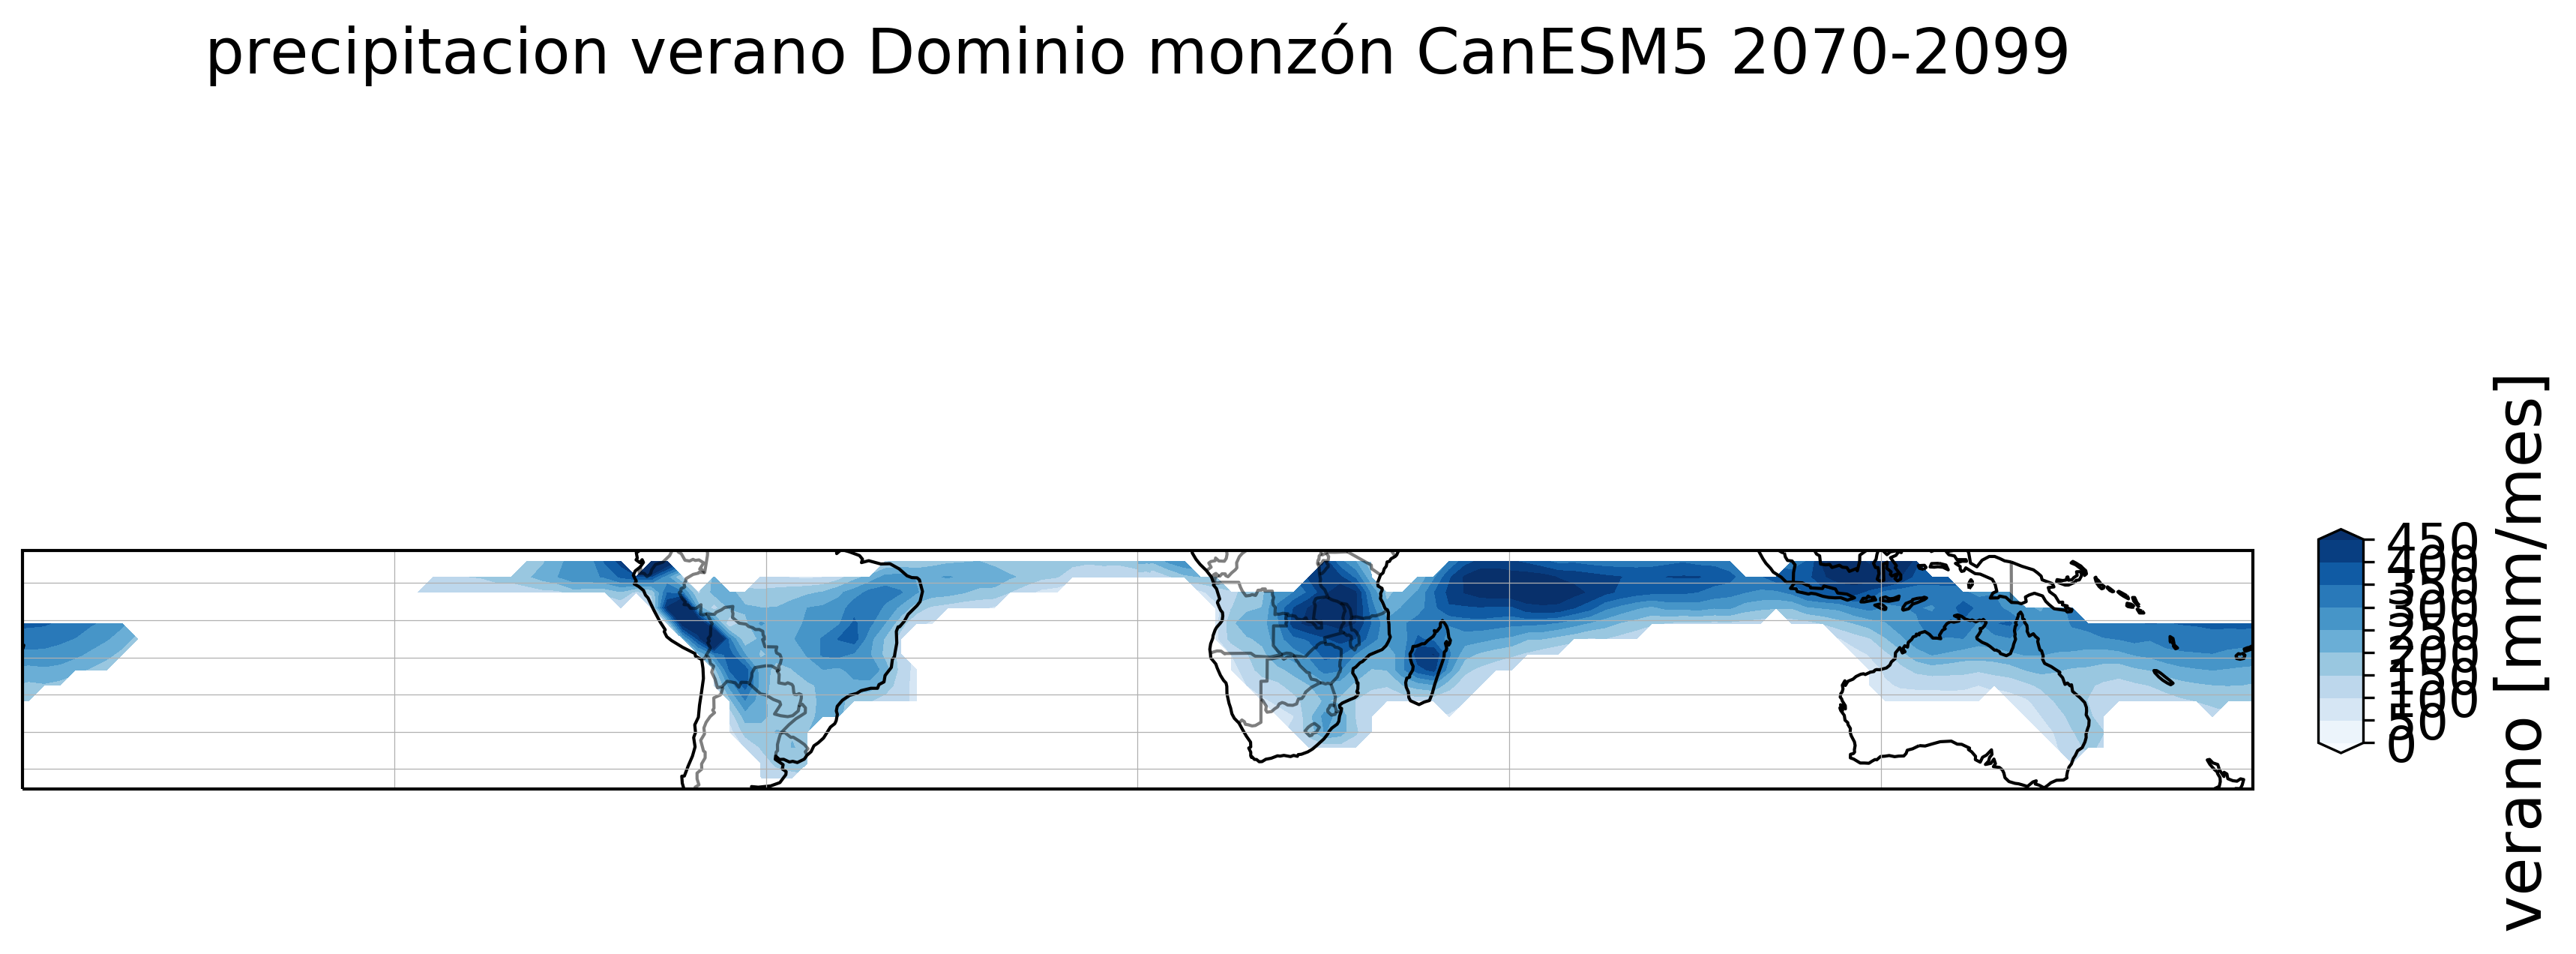

In [75]:
HS_monson_h2 = CanESM5_ens_h2.pr*monzon_mask_HS_h2
HS_hist_h2 = HS_monson_h2.sel(time=HS_monson_h2['time.season']=='DJF').mean(dim='time')
cyclic_data_HS_h2, cyclic_lons = add_cyclic_point(HS_hist_h2, coord=lon)
HN_monson_h2 = CanESM5_ens_h2.pr*monzon_mask_HN_h2
HN_hist_h2 = HN_monson_h2.sel(time=HN_monson_h2['time.season']=='JJA').mean(dim='time')
cyclic_data_HN_h2, cyclic_lons = add_cyclic_point(HN_hist_h2, coord=lon)# +HS_hist_h2.fillna(0.)

titulo = 'precipitacion verano Dominio monzón CanESM5 2070-2099'
clevels = np.arange(0,500,50)
figura = mapa_colores(cyclic_data_HS_h2,cyclic_data_HS_h2,titulo,clevels)

In [76]:
cyclic_data_HS_h2[np.isnan(cyclic_data_HS_h2)]=0
Intensidad = np.sum(cyclic_data_HS_h2) 
Area = np.sum(cyclic_data_HS_h2/cyclic_data_HS_h2)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

244.22244

In [77]:
cyclic_data_HN_h2[np.isnan(cyclic_data_HN_h2)]=0
Intensidad = np.sum(cyclic_data_HN_h2) 
Area = np.sum(cyclic_data_HN_h2/cyclic_data_HN_h2)
#figura = mapa_colores(cyclic_data_HN,cyclic_data_HN,titulo,clevels)
Intensidad/Area

233.54239

In [78]:
(220.95-217.09)/217.09

0.01778064397254588

## Cambios en la precipitación 

In [79]:
#Genero un mapa para la precipitacion 
def mapa_colores(dato1,dato2,titulo,clevels):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    clevels = clevels
    im1=ax1.contourf(cyclic_lons, lat, dato1,clevels,transform=data_crs,cmap='Greens',extend='both')
    im1=ax1.contourf(cyclic_lons, lat, dato2,clevels,transform=data_crs,cmap='Greens',extend='both')
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #ax1.set_title('Annual range')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.66, x=0.5,fontsize=20)
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('verano [mm/mes] ',fontsize=20)
    return fig


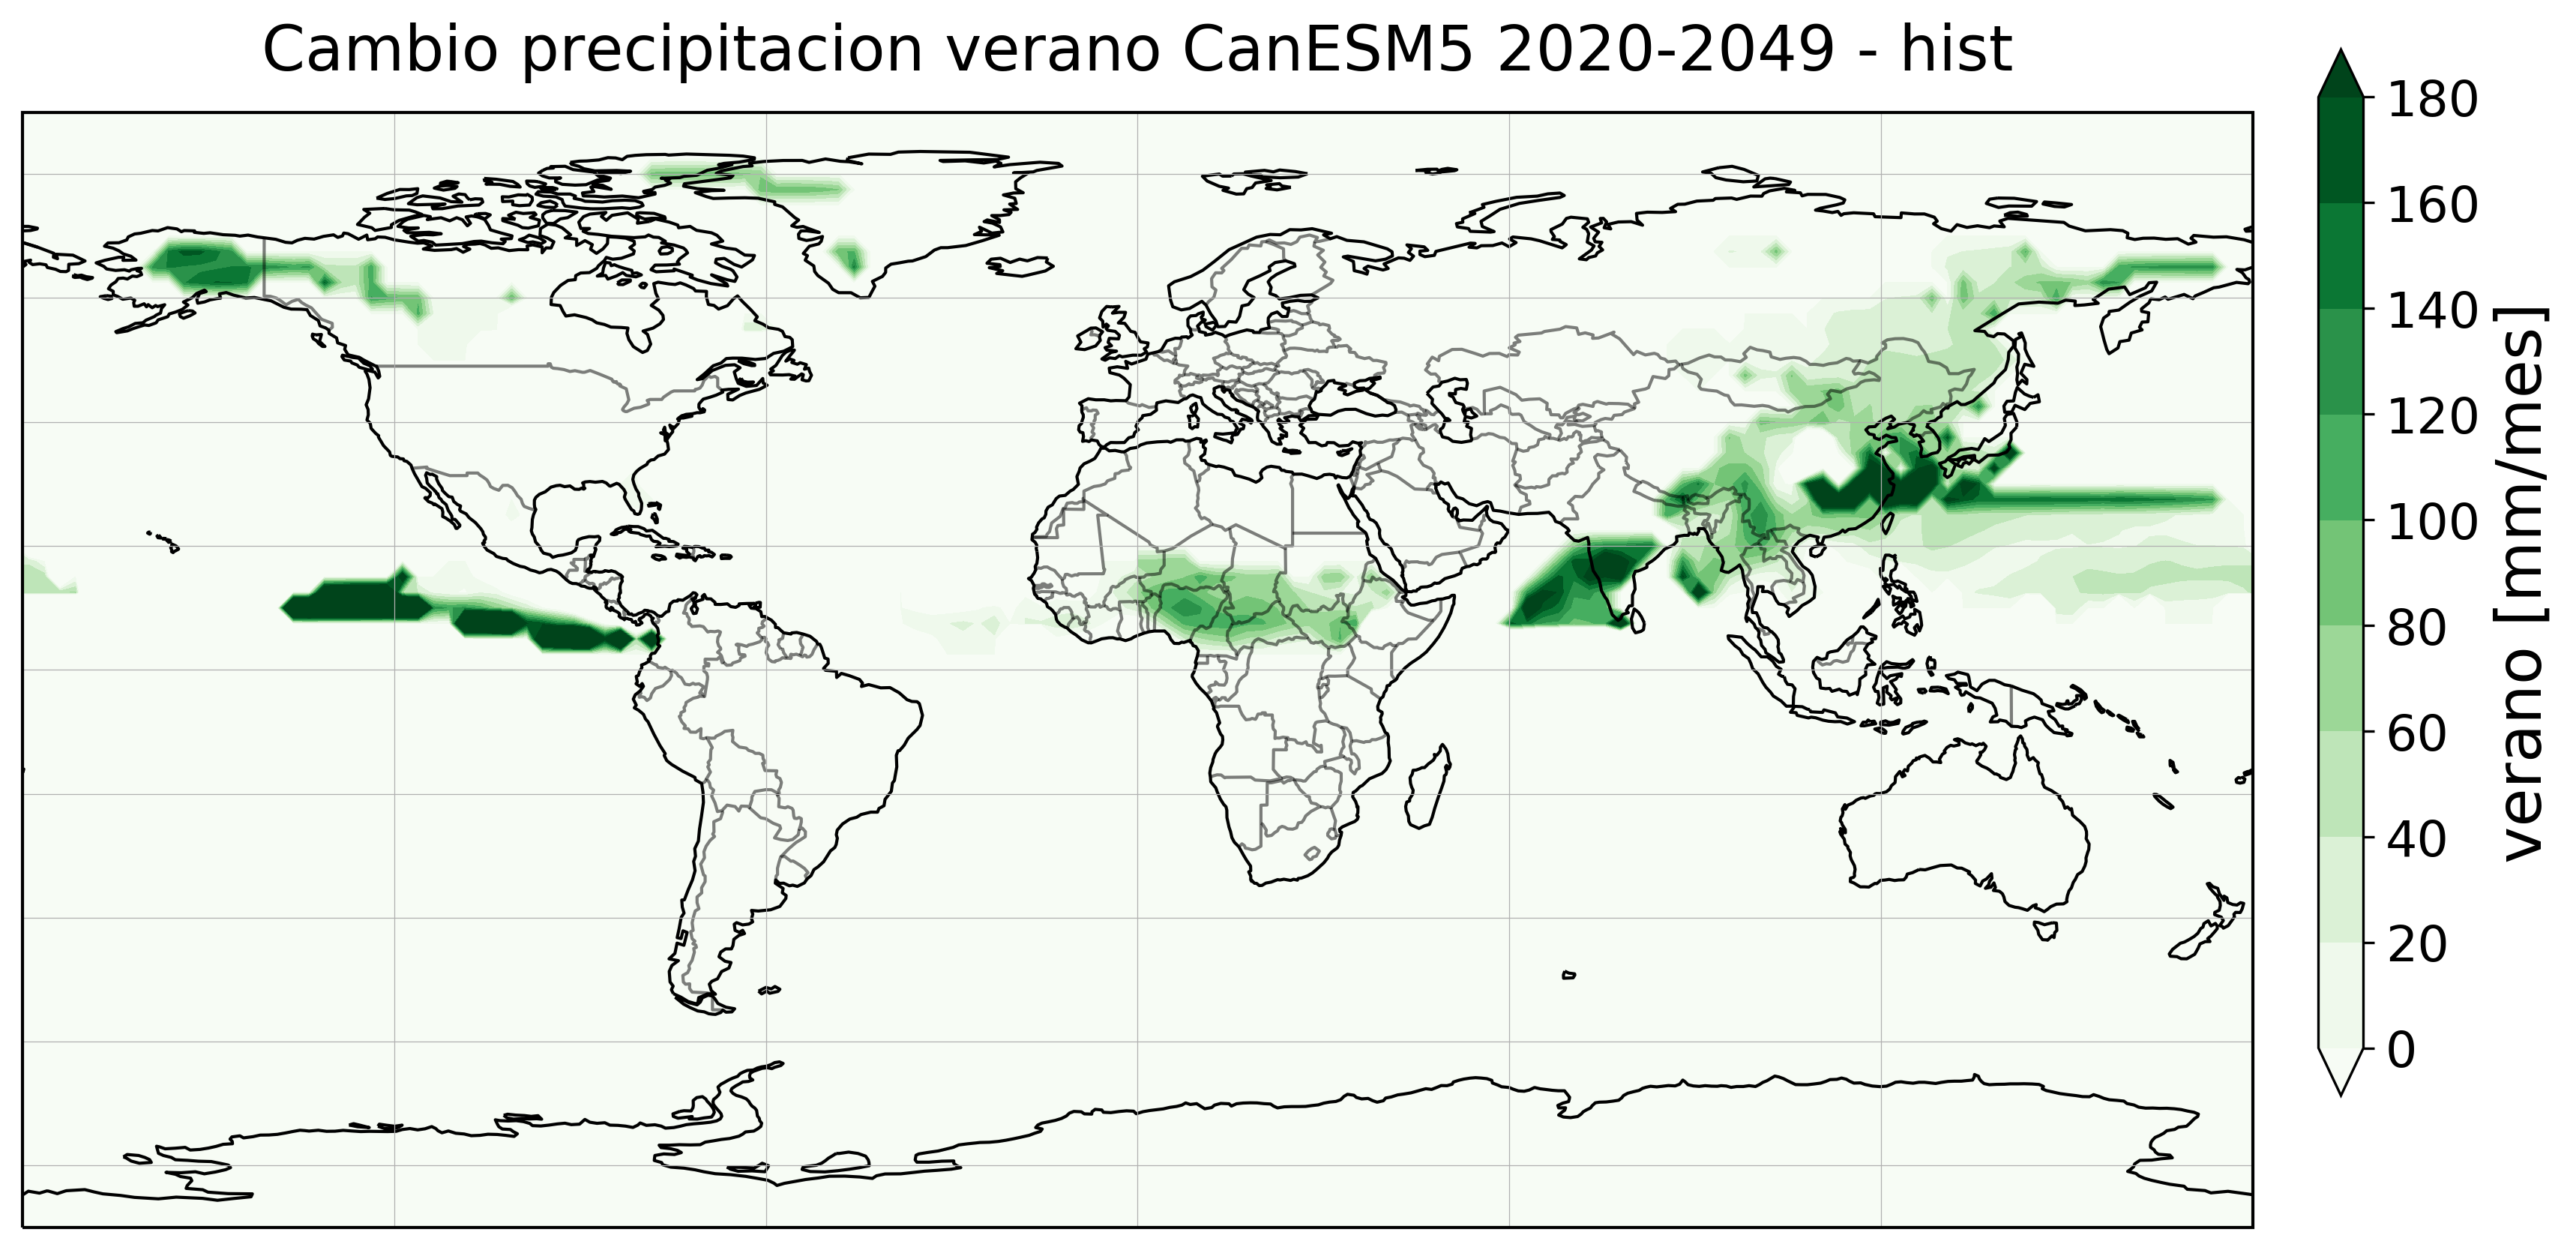

In [80]:
titulo = 'Cambio precipitacion verano CanESM5 2020-2049 - hist'
clevels = np.arange(0,200,20)
figura = mapa_colores(cyclic_data_HS_h2-cyclic_data_HS,cyclic_data_HN_h2-cyclic_data_HN,titulo,clevels)

In [81]:
titulo = 'Cambio precipitacion verano CanESM5 2070-2099 - hist'
clevels = np.arange(0,100,20)
figura = mapa_colores(cyclic_data_h2-cyclic_data_HN,cyclic_data_h2-cyclic_data_HN,titulo,clevels)

NameError: name 'cyclic_data_h2' is not defined

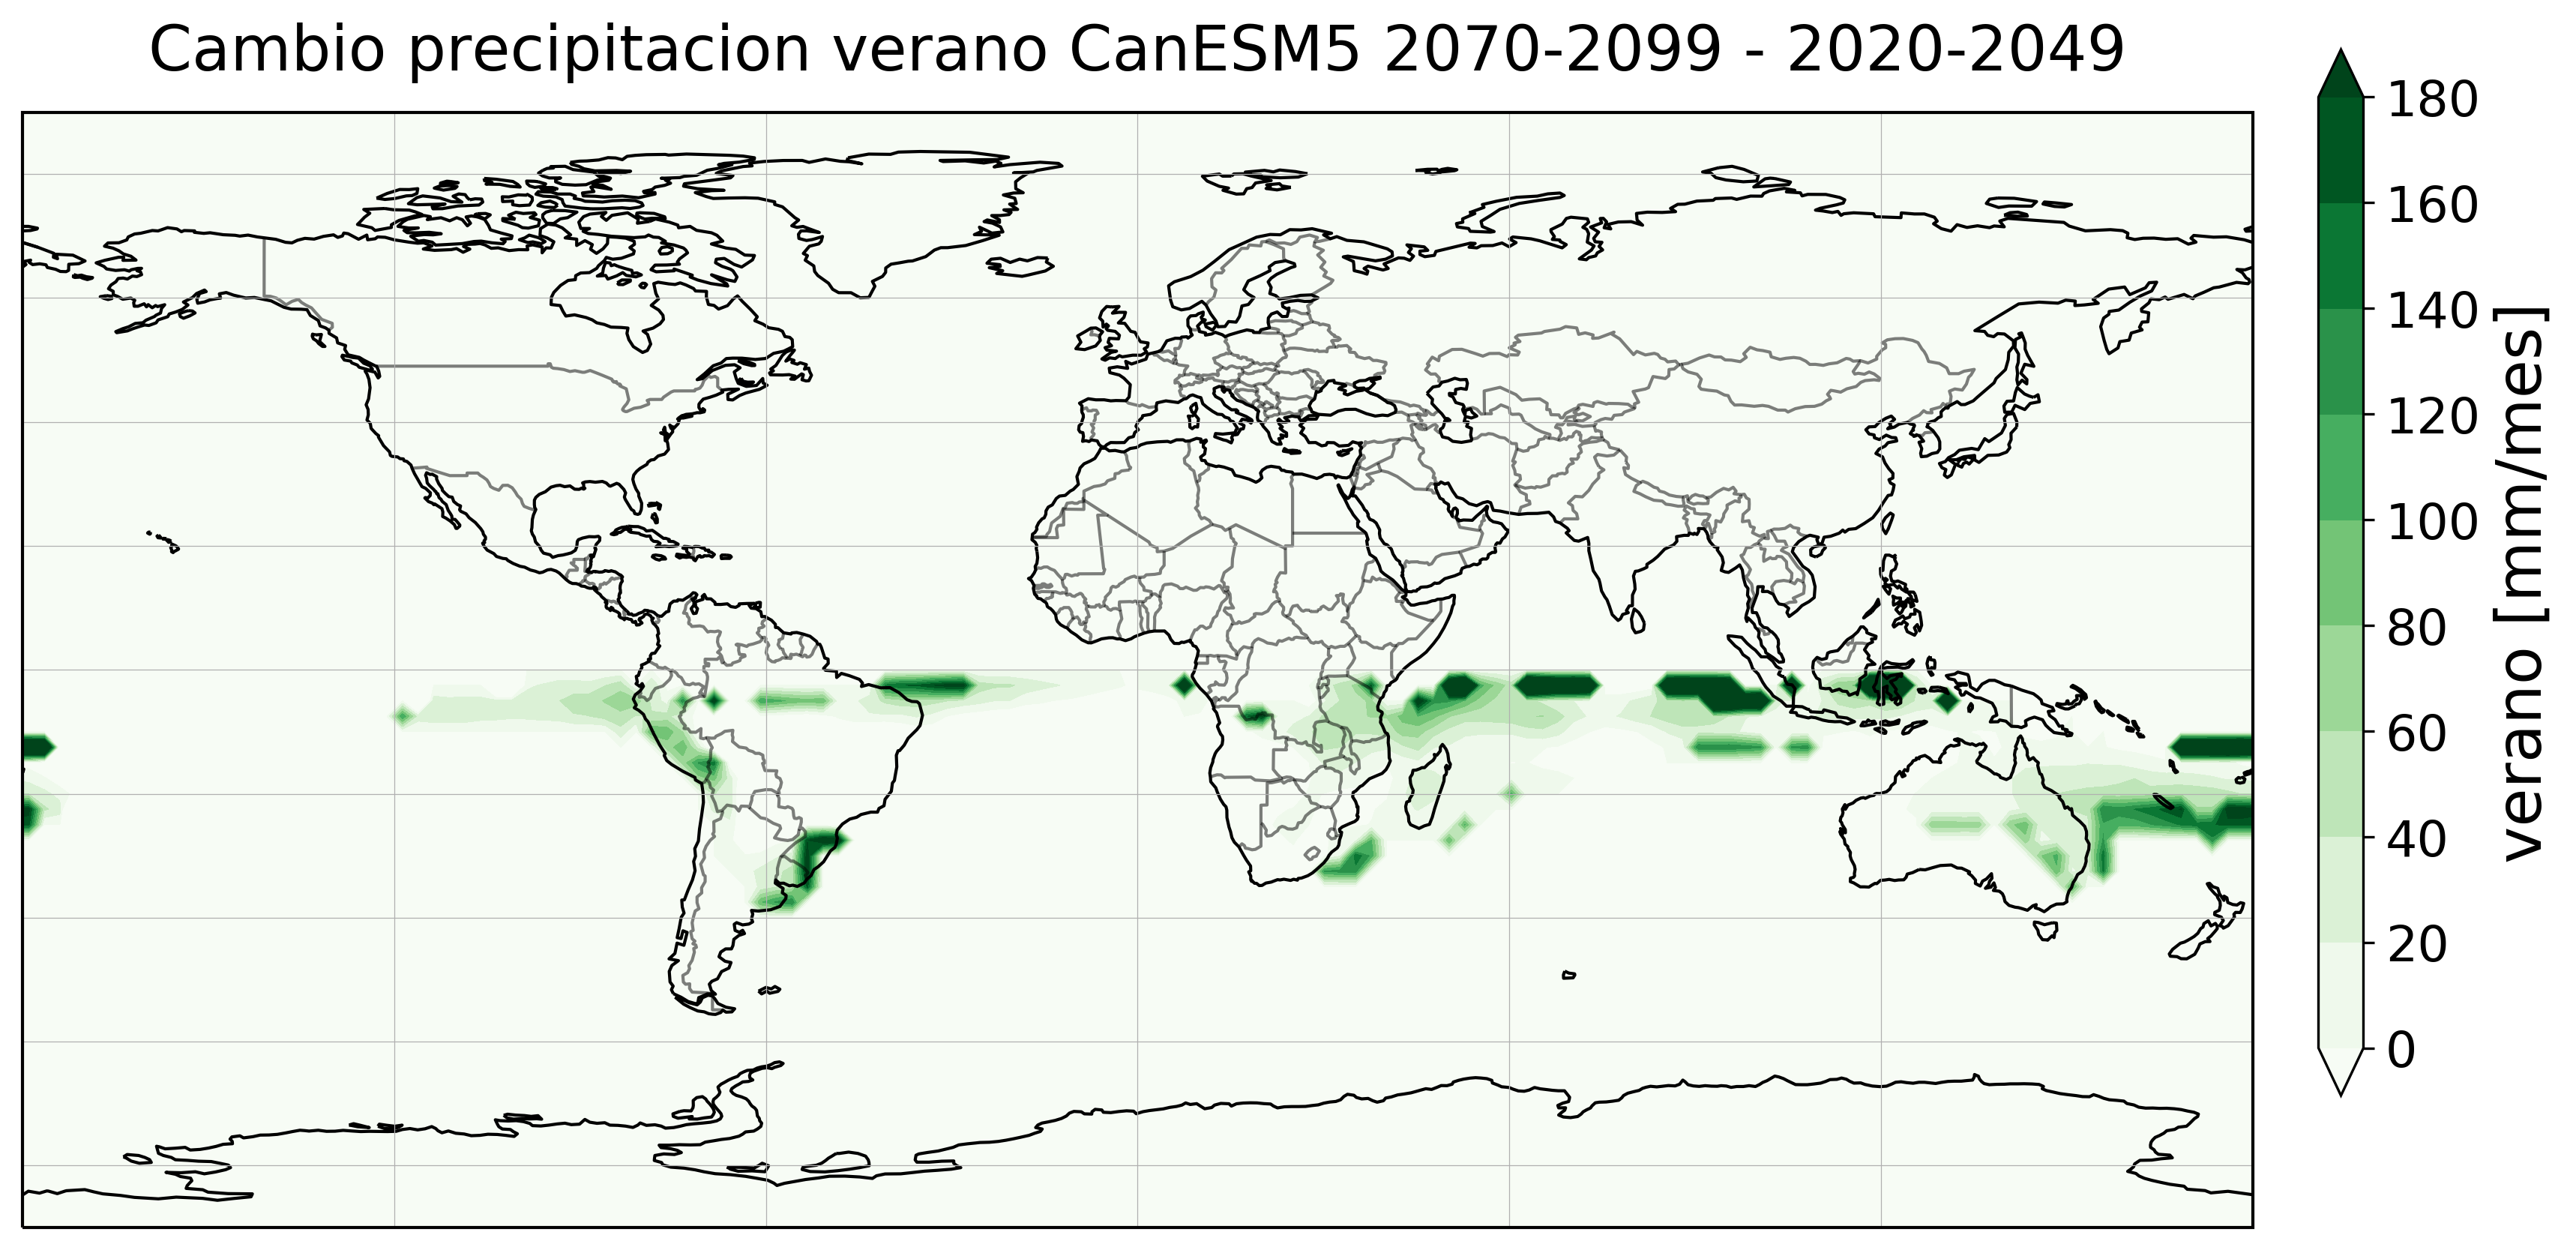

In [82]:
titulo = 'Cambio precipitacion verano CanESM5 2070-2099 - 2020-2049'
clevels = np.arange(0,200,20)
figura = mapa_colores(cyclic_data_HN_h2-cyclic_data_HN_h1,cyclic_data_HS_h2-cyclic_data_HS_h1,titulo,clevels)

## Ciclo anual

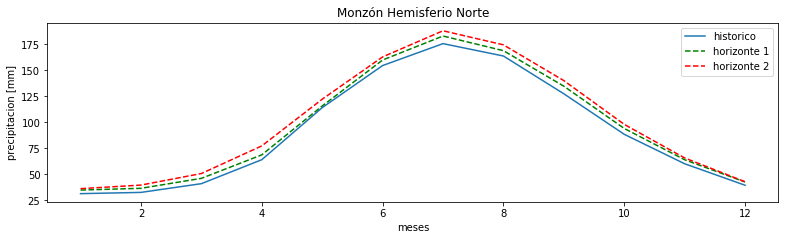

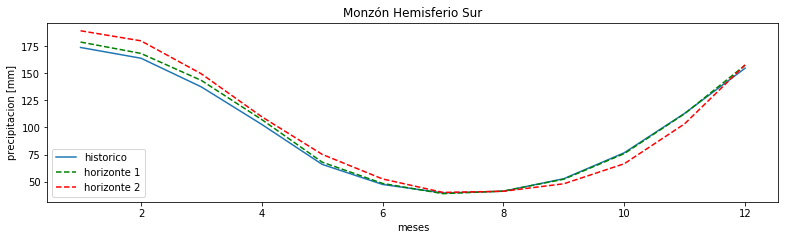

In [45]:
#Calculo el ciclo anual
monson_HS = HS_monson.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
monson_HN = HN_monson.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
monson_HS_h1 = HS_monson_h1.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
monson_HN_h1 = HN_monson_h1.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
monson_HS_h2 = HS_monson_h2.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
monson_HN_h2 = HN_monson_h2.mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
meses = monson_HN.month
plt.plot(meses,monson_HN,label='historico')
plt.plot(meses,monson_HN_h1,'--g',label='horizonte 1')
plt.plot(meses,monson_HN_h2,'--r',label='horizonte 2')
plt.xlabel('meses')
plt.ylabel('precipitacion [mm]')
plt.title('Monzón Hemisferio Norte')
#plt.savefig(path+'ciclo_anual_HN_CanESM2.png',bbox_inches='tight')
plt.legend()
plt.show()
plt.plot(meses,monson_HS,label='historico')
plt.plot(meses,monson_HS_h1,'--g',label='horizonte 1')
plt.plot(meses,monson_HS_h2,'--r',label='horizonte 2')
plt.xlabel('meses')
plt.ylabel('precipitacion [mm]')
plt.title('Monzón Hemisferio Sur')
#plt.savefig(path+'ciclo_anual_HS_CanESM2.png',bbox_inches='tight')
plt.legend()
plt.show()

In [242]:
#Genero un mapa para la precipitacion 
def mapa_colores2(dato1,dato2,titulo,clevels):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    ax1.set_extent([-90,50, -70, 10], ccrs.PlateCarree())
    clevels = clevels
    im1=ax1.contourf(cyclic_lons, lat, dato1,clevels,transform=data_crs,cmap='Greens',extend='both')
    im1=ax1.contourf(cyclic_lons, lat, dato2,clevels,transform=data_crs,cmap='Greens',extend='both')
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #ax1.set_title('Annual range')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.65, x=0.5,fontsize=20)
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label('verano [mm/mes] ',fontsize=20)
    return fig


In [212]:
cyclic_data_HS[np.isnan(cyclic_data_HS)]=0

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

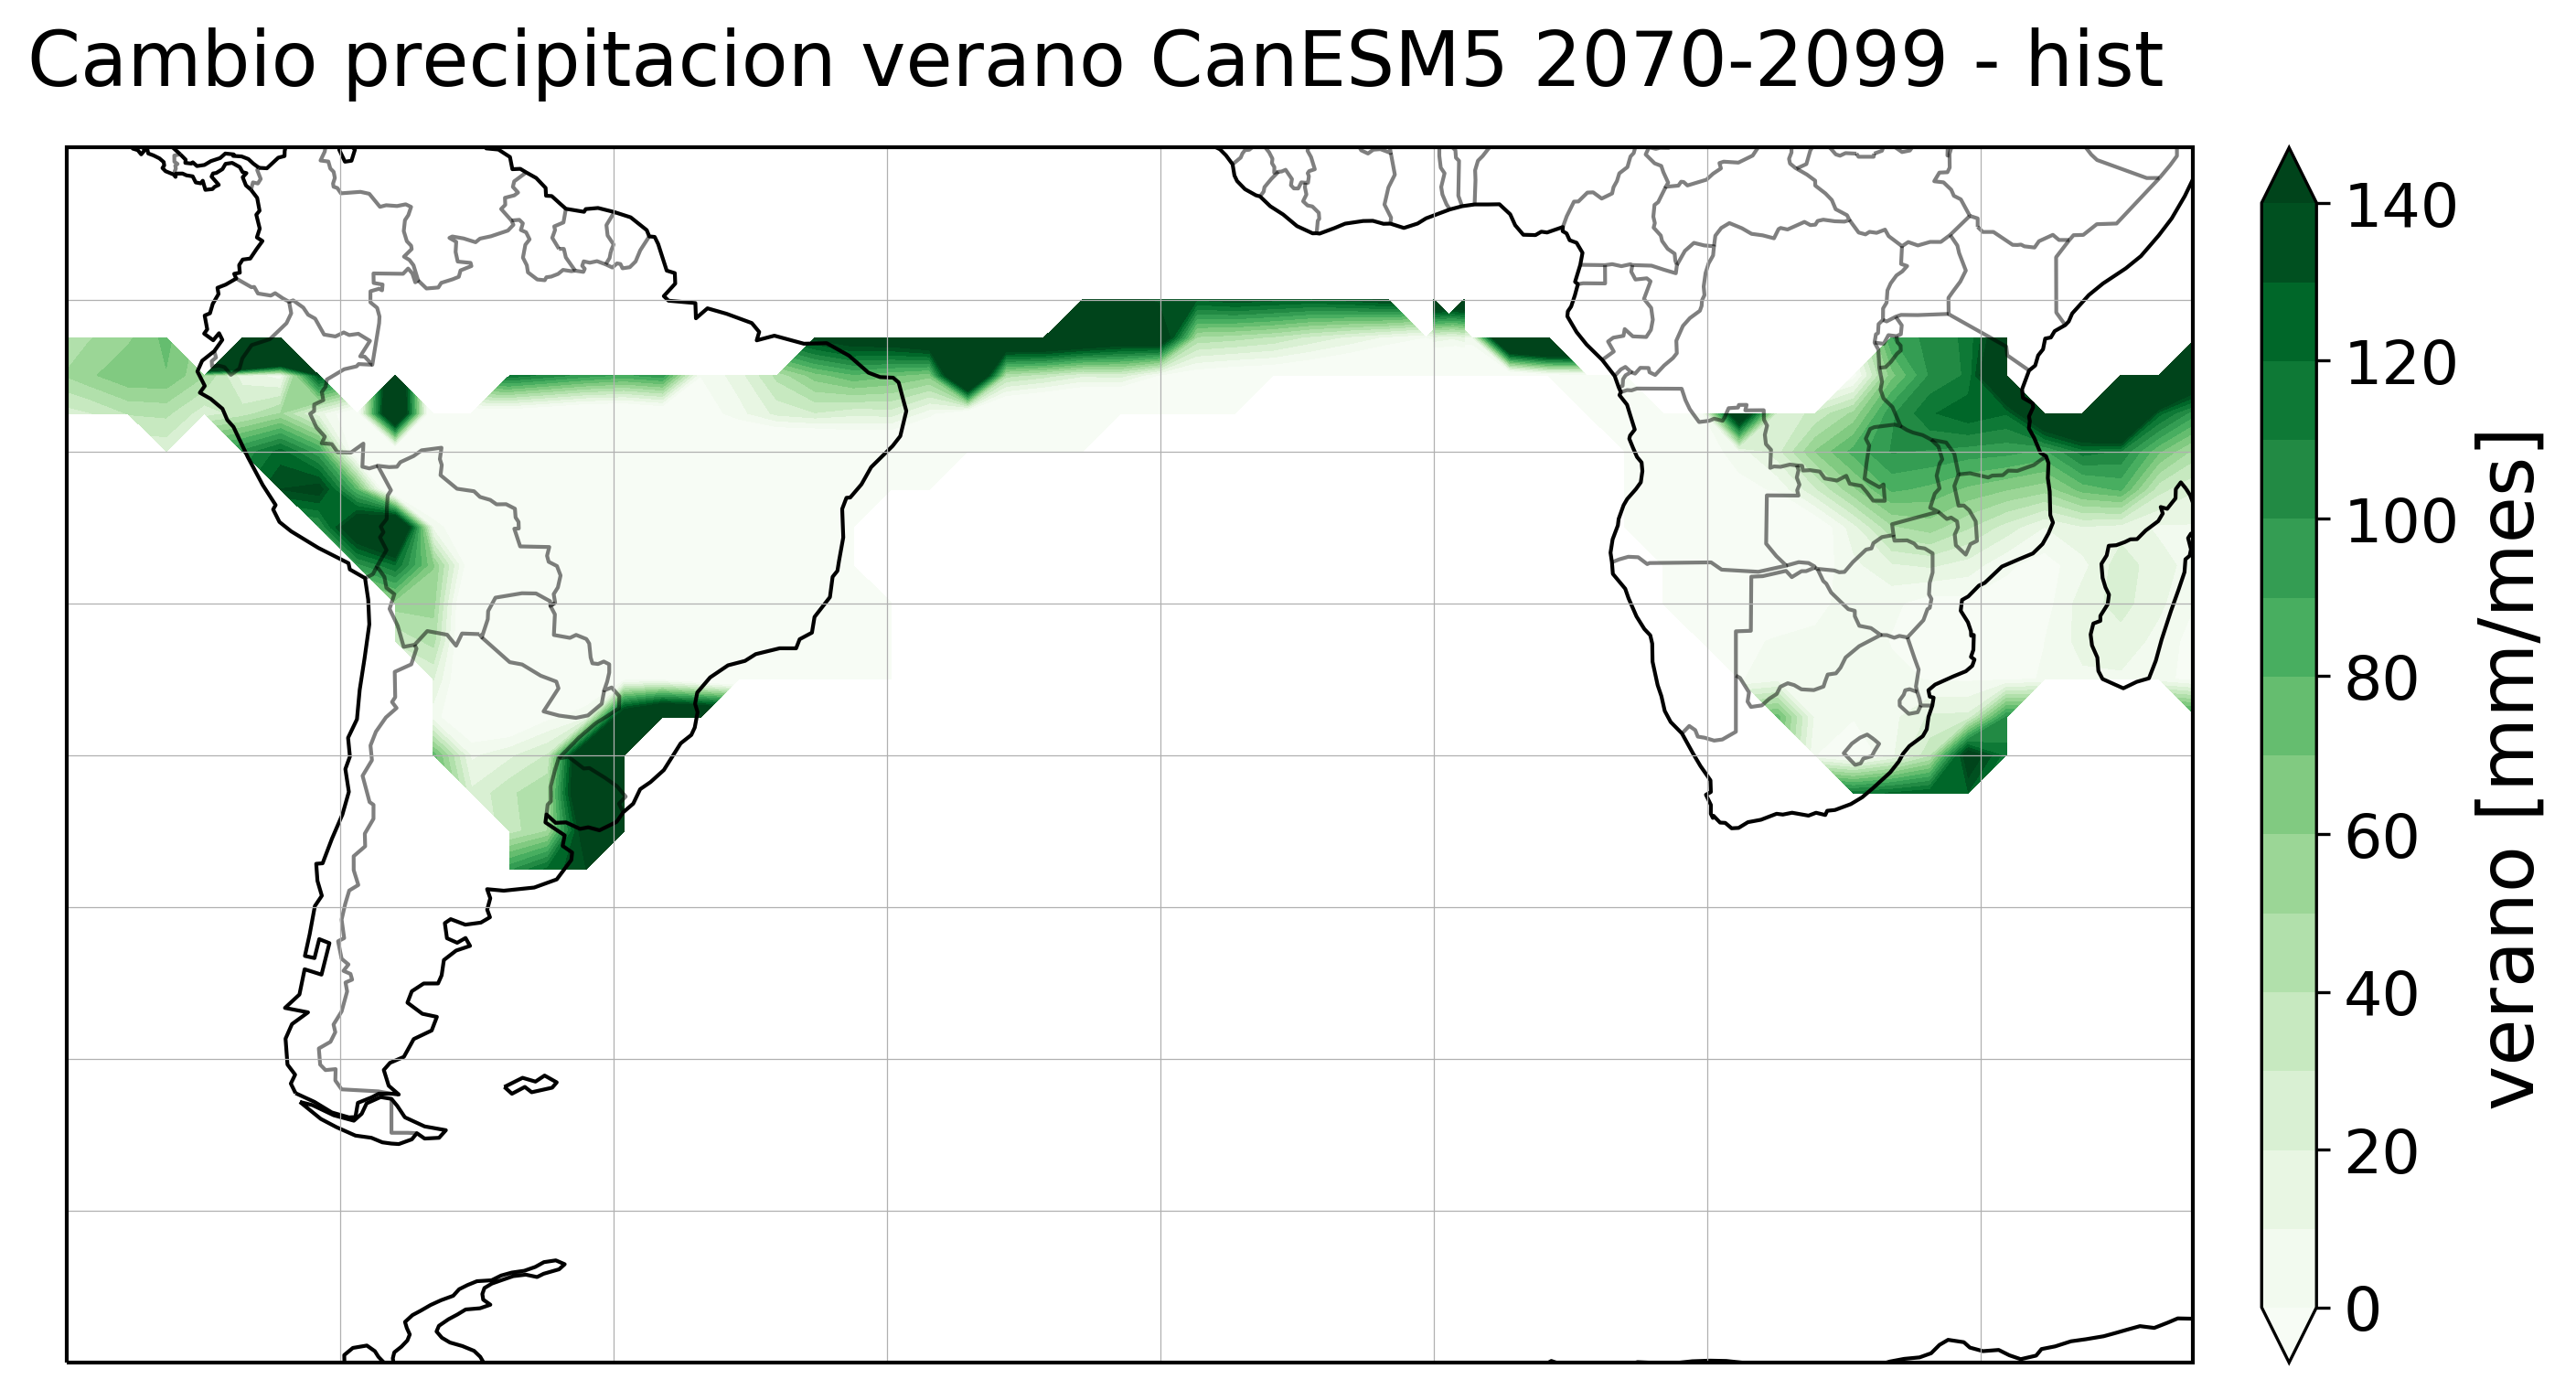

In [243]:
cyclic_data_HS[np.isnan(cyclic_data_HS)]=0
titulo = 'Cambio precipitacion verano CanESM5 2070-2099 - hist'
clevels = np.arange(0,150,10)
figura = mapa_colores2(cyclic_data_HS_h2-cyclic_data_HS,cyclic_data_HS_h2-cyclic_data_HS,titulo,clevels)

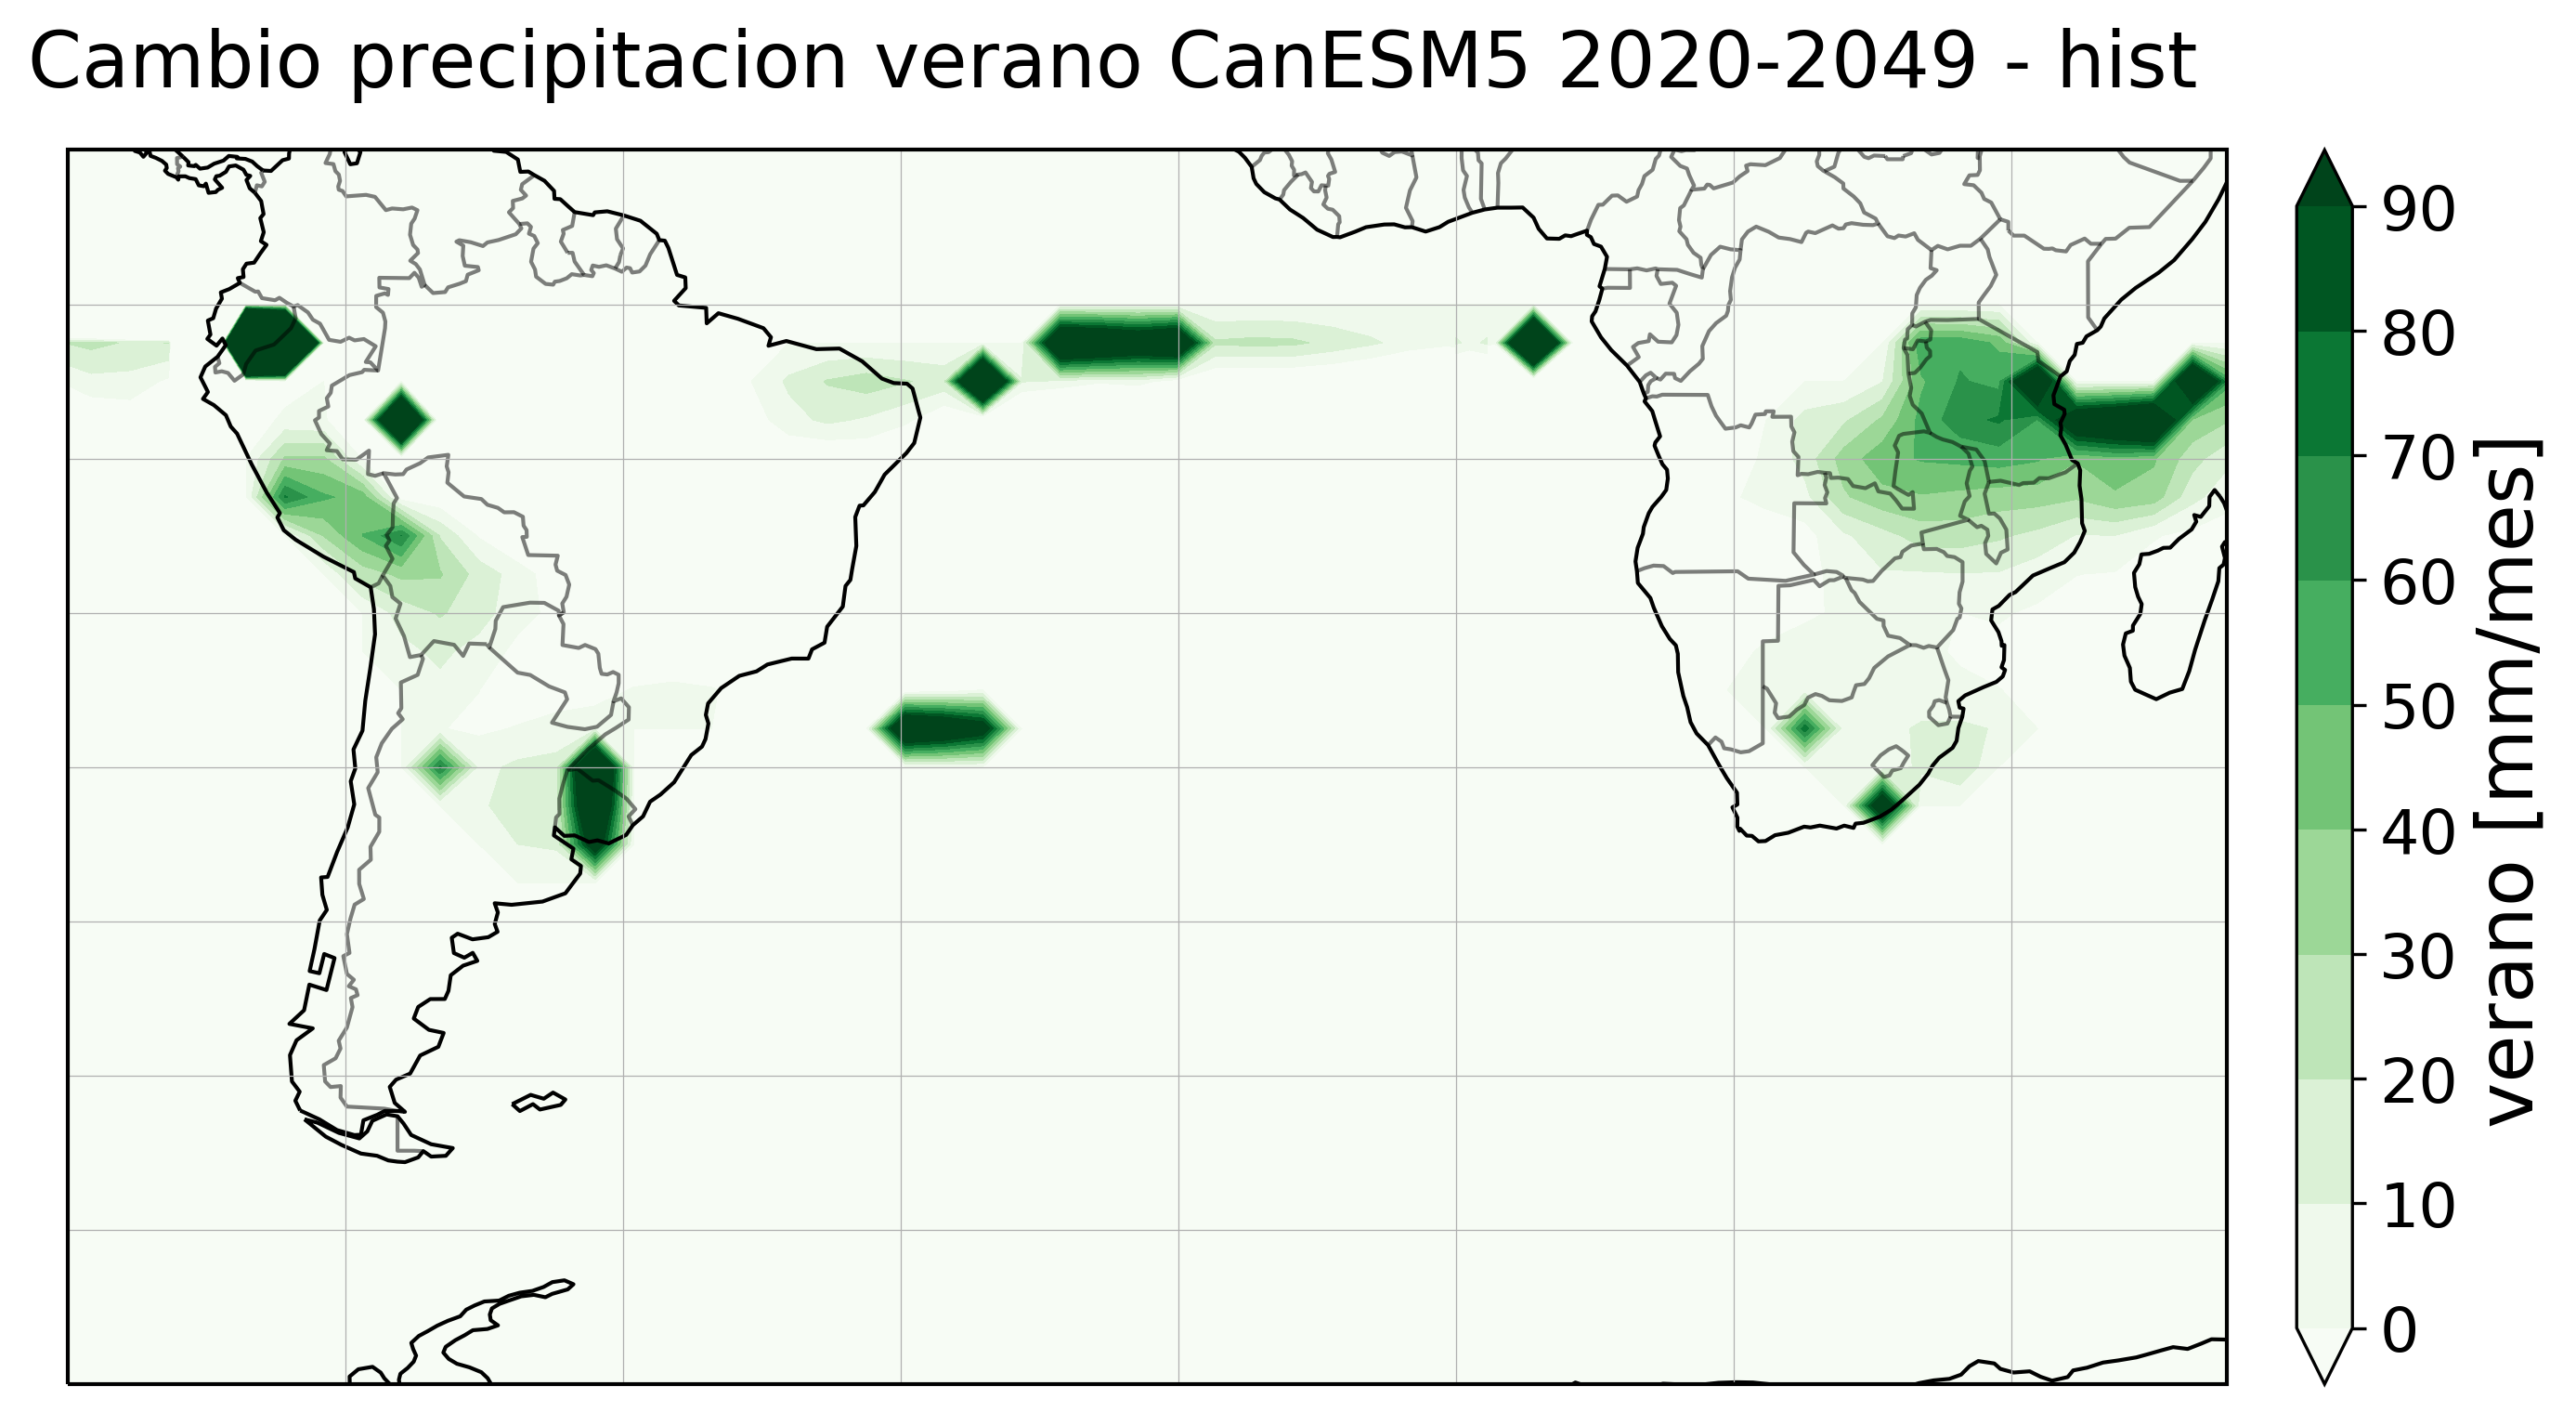

In [244]:
cyclic_data_HS_h1[np.isnan(cyclic_data_HS_h1)]=0
titulo = 'Cambio precipitacion verano CanESM5 2020-2049 - hist'
clevels = np.arange(0,100,10)
figura = mapa_colores2(cyclic_data_HS_h1-cyclic_data_HS,cyclic_data_HS_h1-cyclic_data_HS,titulo,clevels)

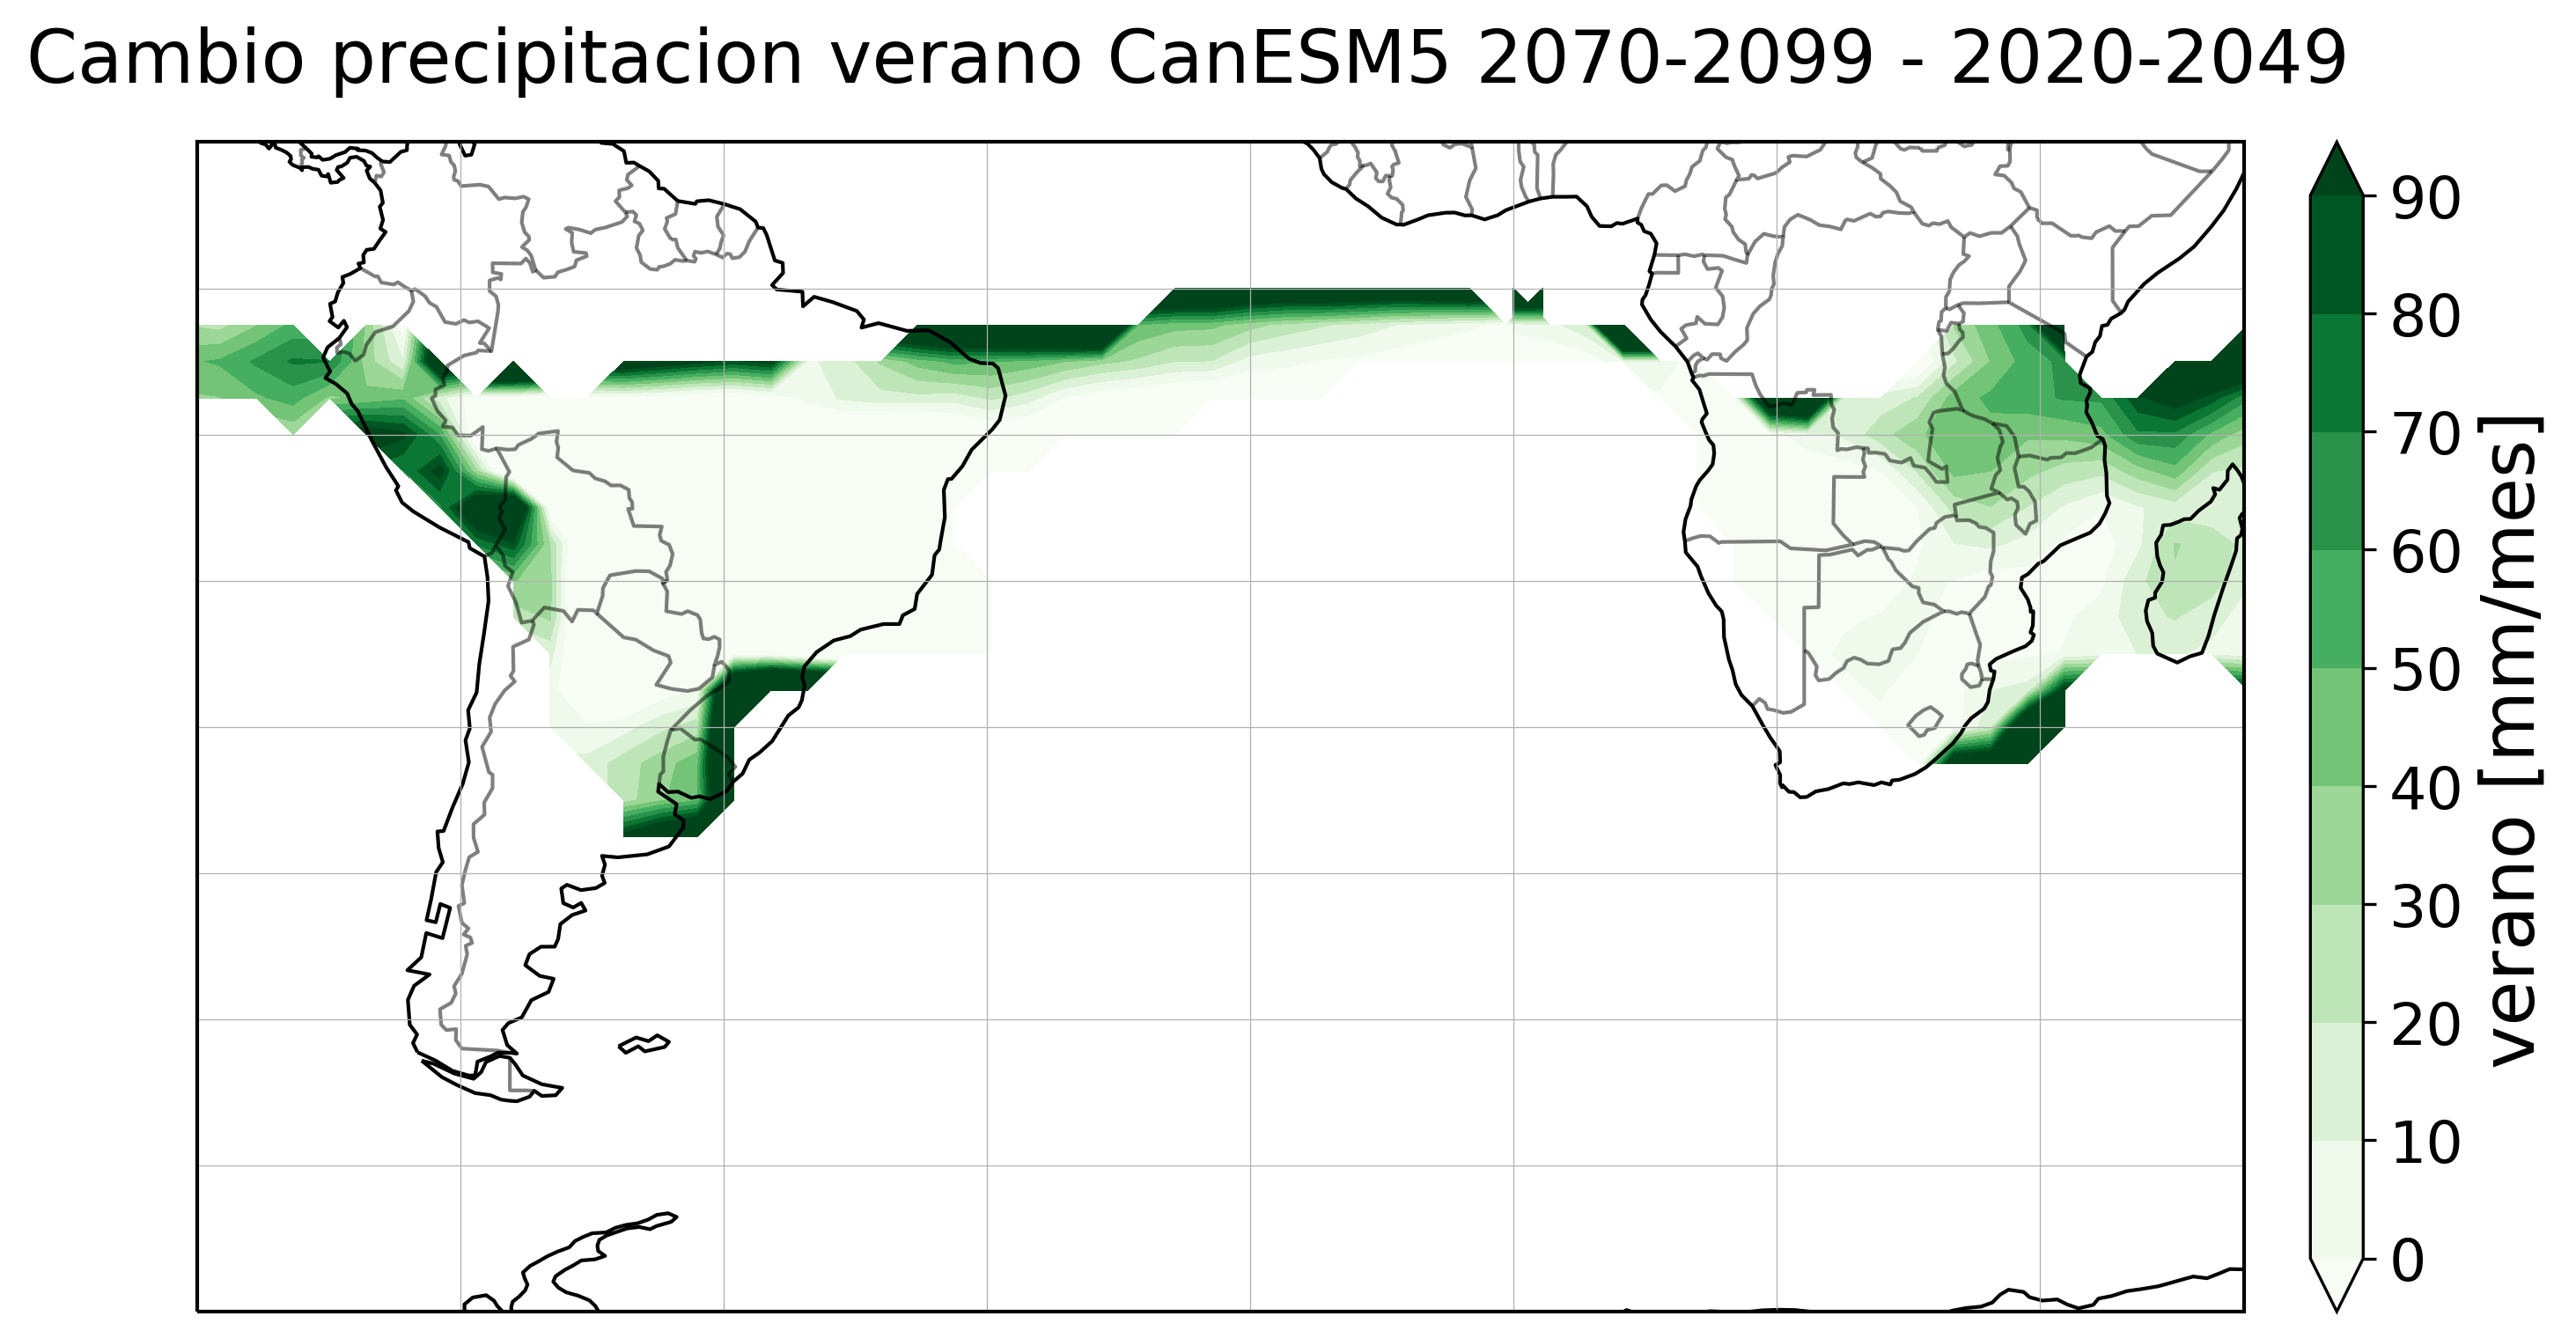

In [245]:
cyclic_data_HS_h1[np.isnan(cyclic_data_HS_h1)]=0
titulo = 'Cambio precipitacion verano CanESM5 2070-2099 - 2020-2049'
clevels = np.arange(0,100,10)
figura = mapa_colores2(cyclic_data_HS_h2-cyclic_data_HS_h1,cyclic_data_HS_h2-cyclic_data_HS_h1,titulo,clevels)

In [21]:


def mapa_regional(dato1,dato2,titulo):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    ax1.set_extent([100,180, -50, 10], ccrs.PlateCarree())
    #ax1.set_extent([275,335, 10, -60], crs=data_crs)
    clevels = np.arange(0,12,2)
    levels1 = [dato1.min(),.4,dato1.max()]
    ax1.contourf(cyclic_lons, lat, dato1,levels1, transform=data_crs,levels=levels1, hatches=["", "..."], alpha=0.001)
    levels2 = [dato2.min(),.4,dato2.max()]
    ax1.contourf(cyclic_lons, lat, dato2,levels2, transform=data_crs,levels=levels2, hatches=["", "..."], alpha=.001)
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    #colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.68, x=0.5,fontsize=20)
    return fig


IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not f

Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Poi

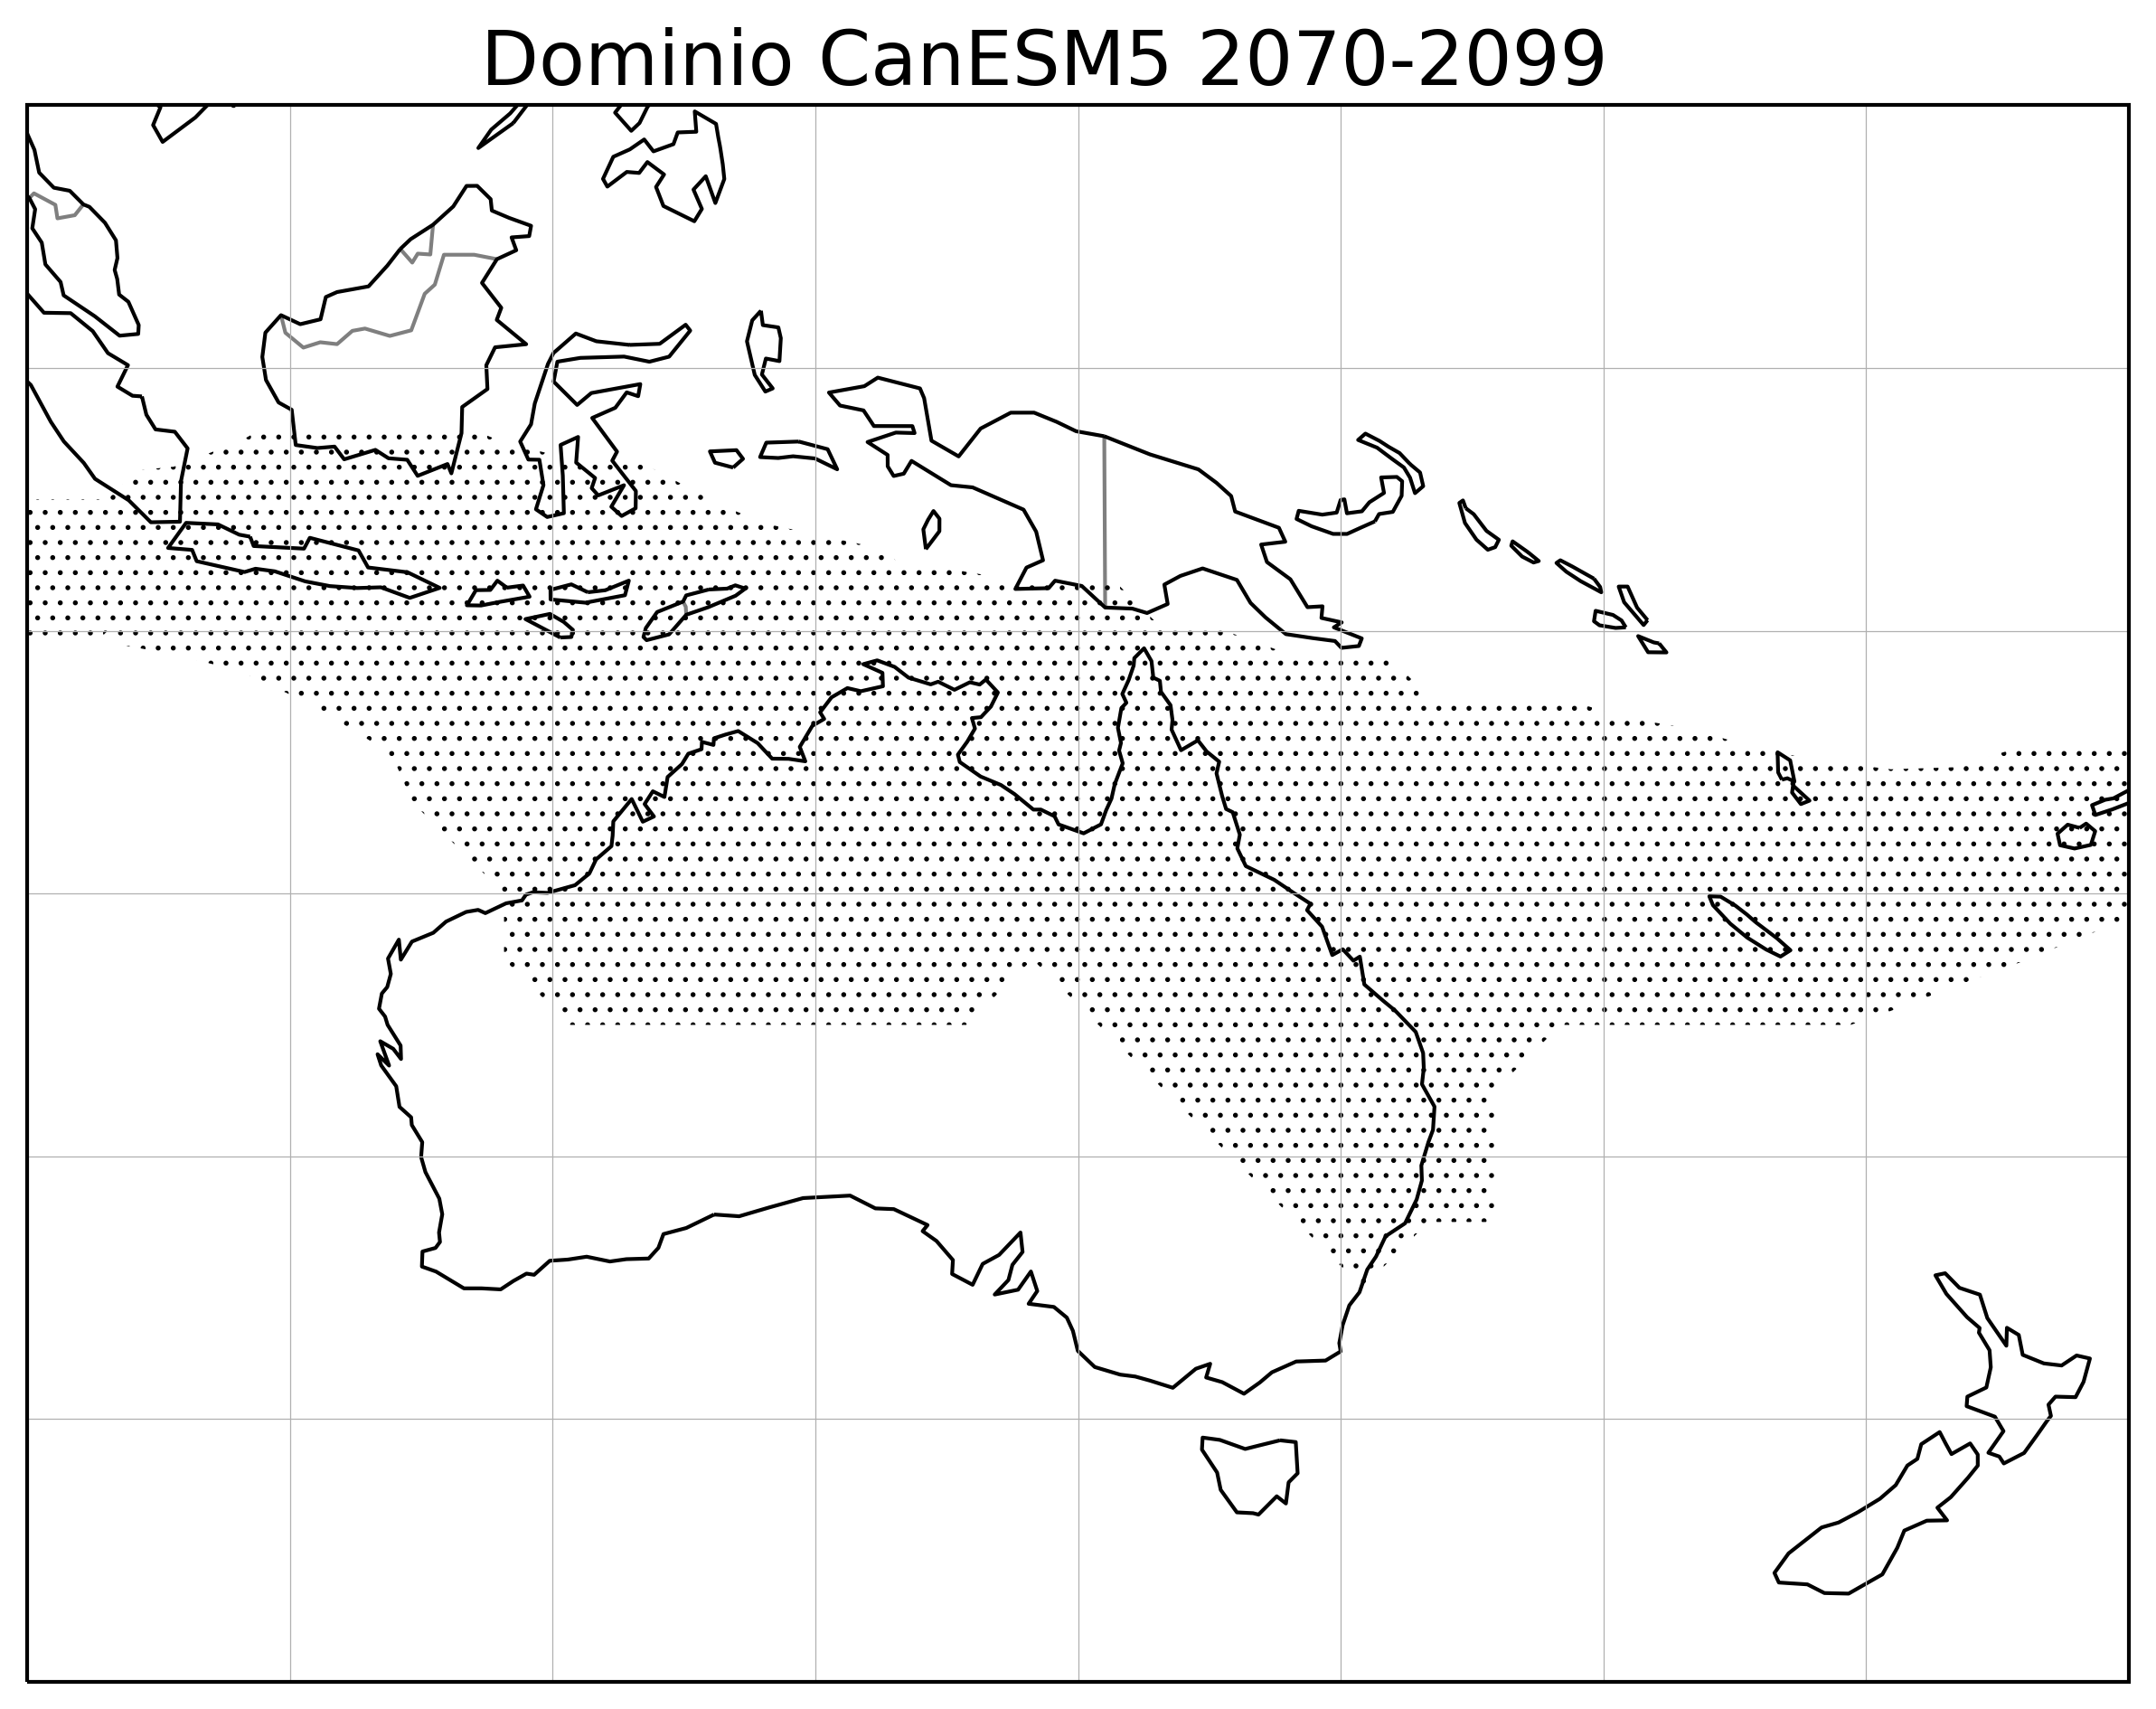

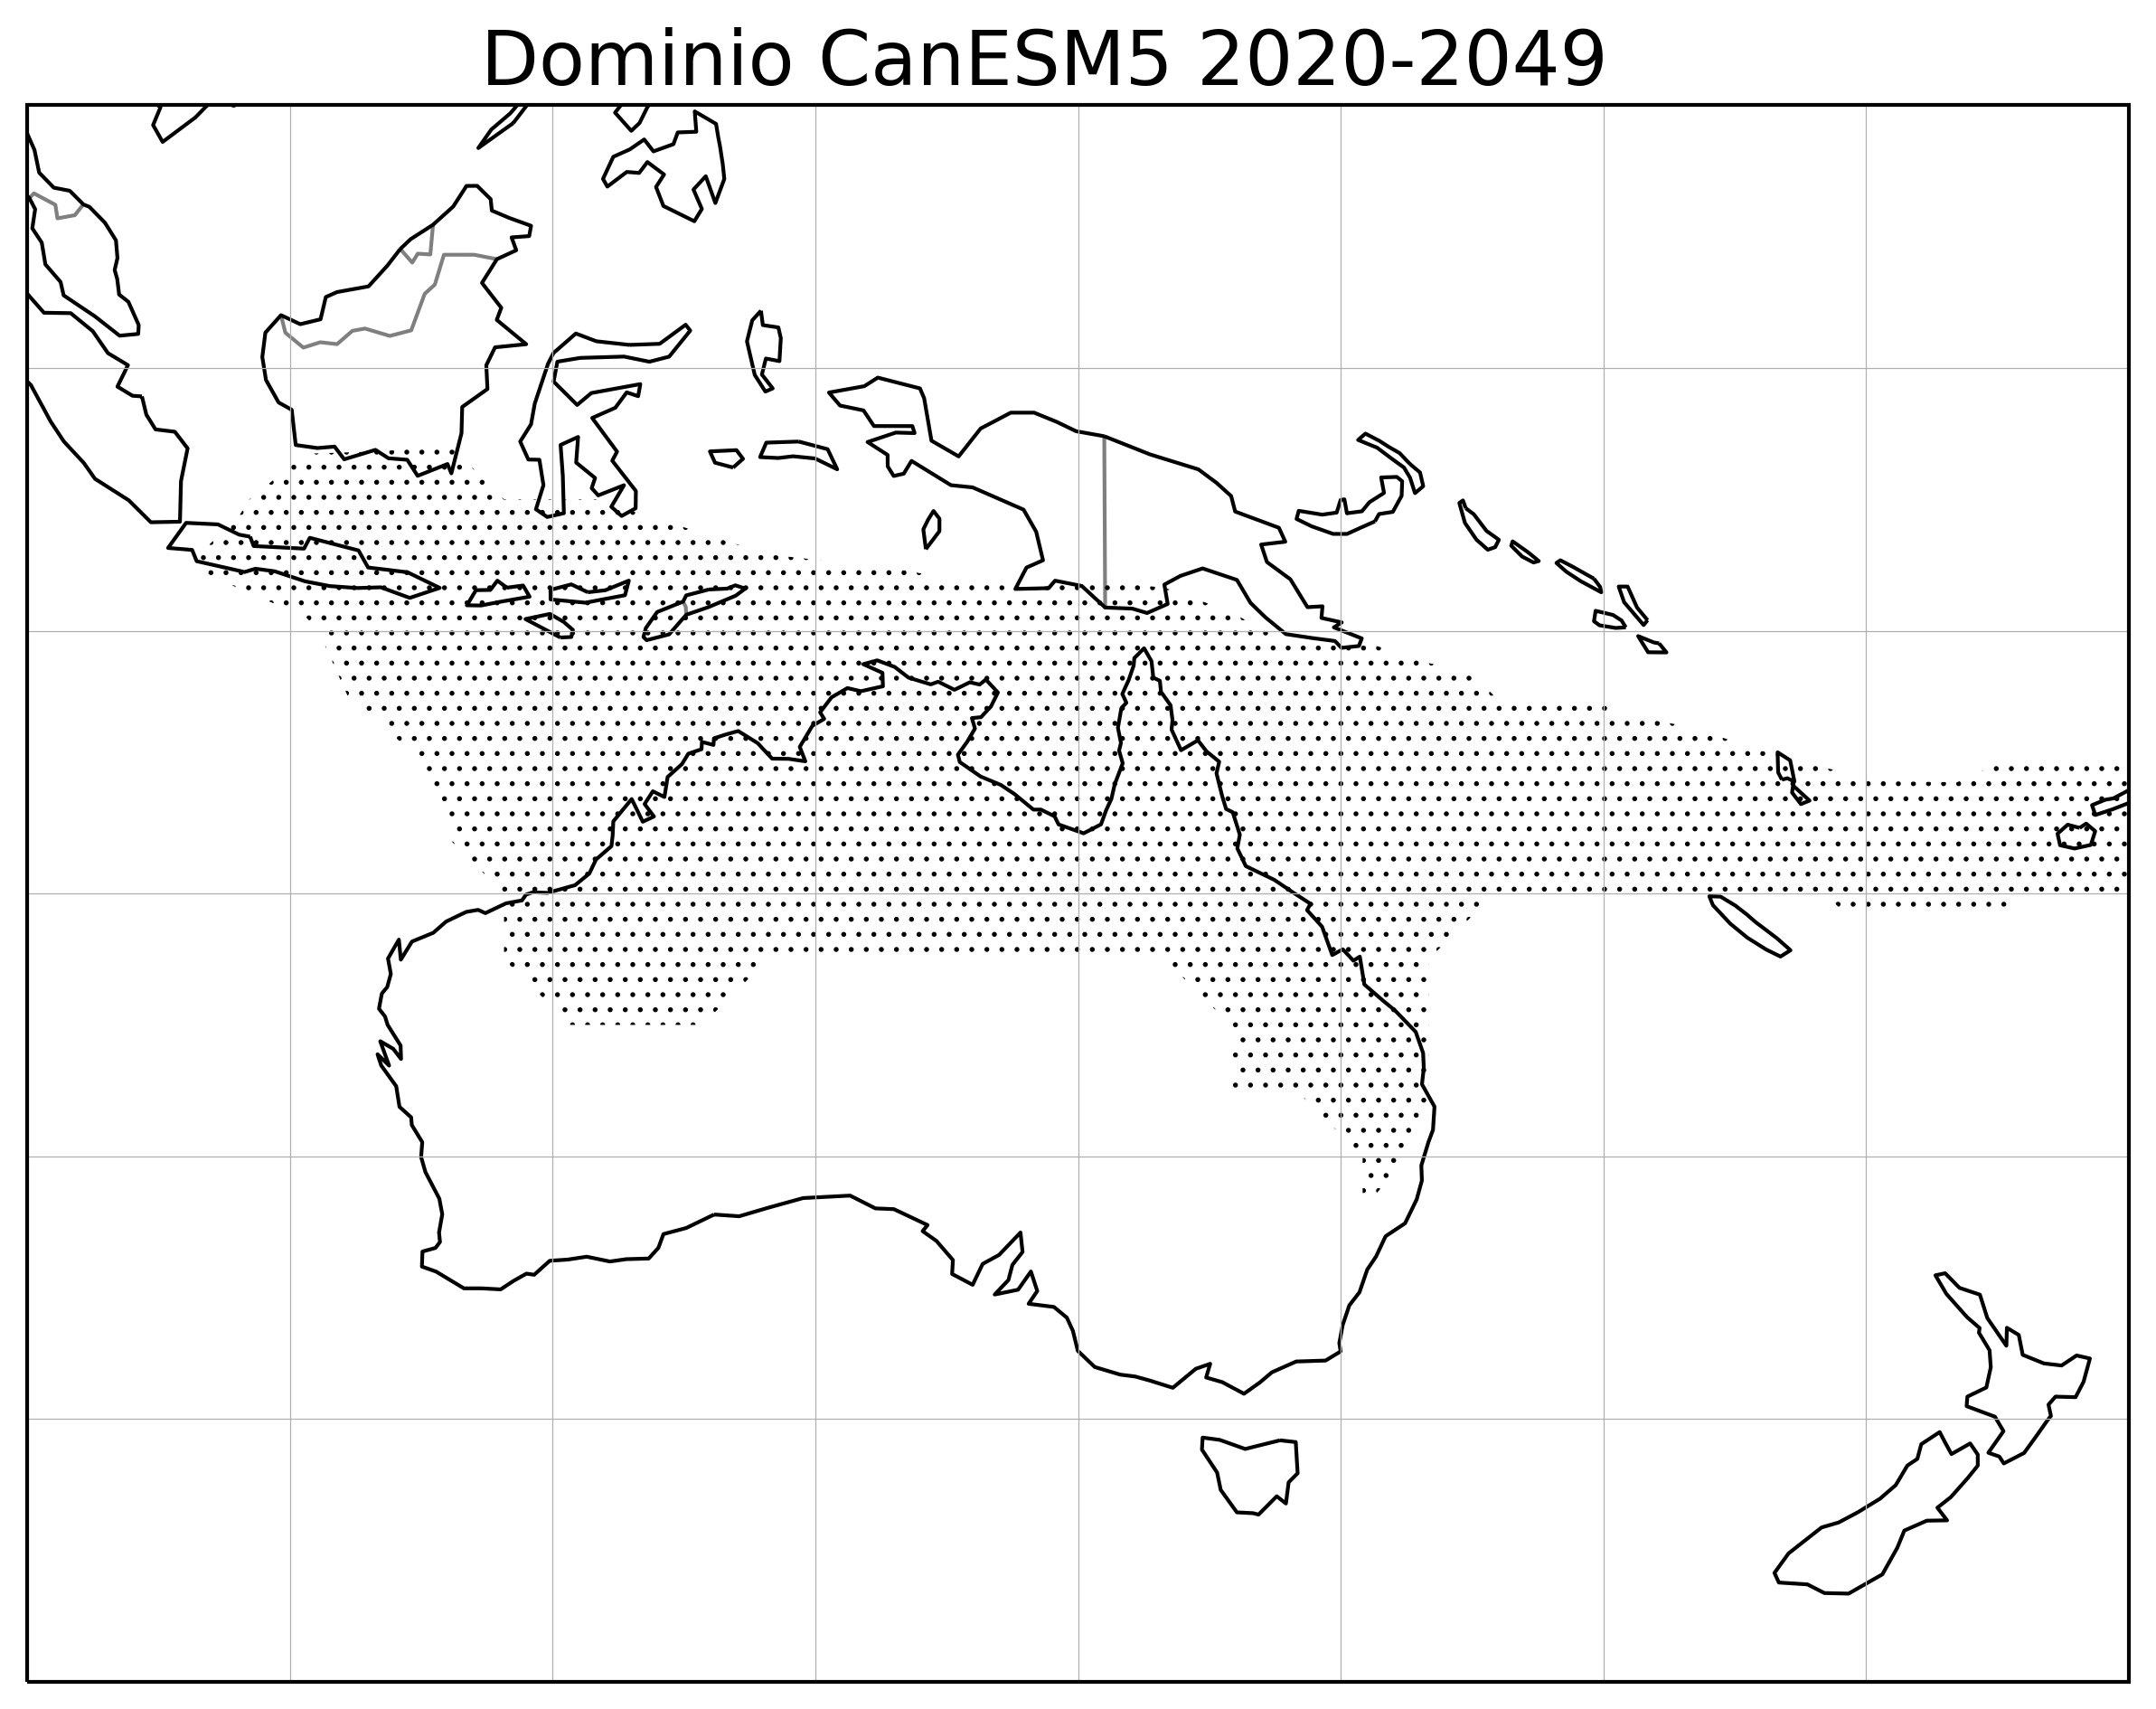

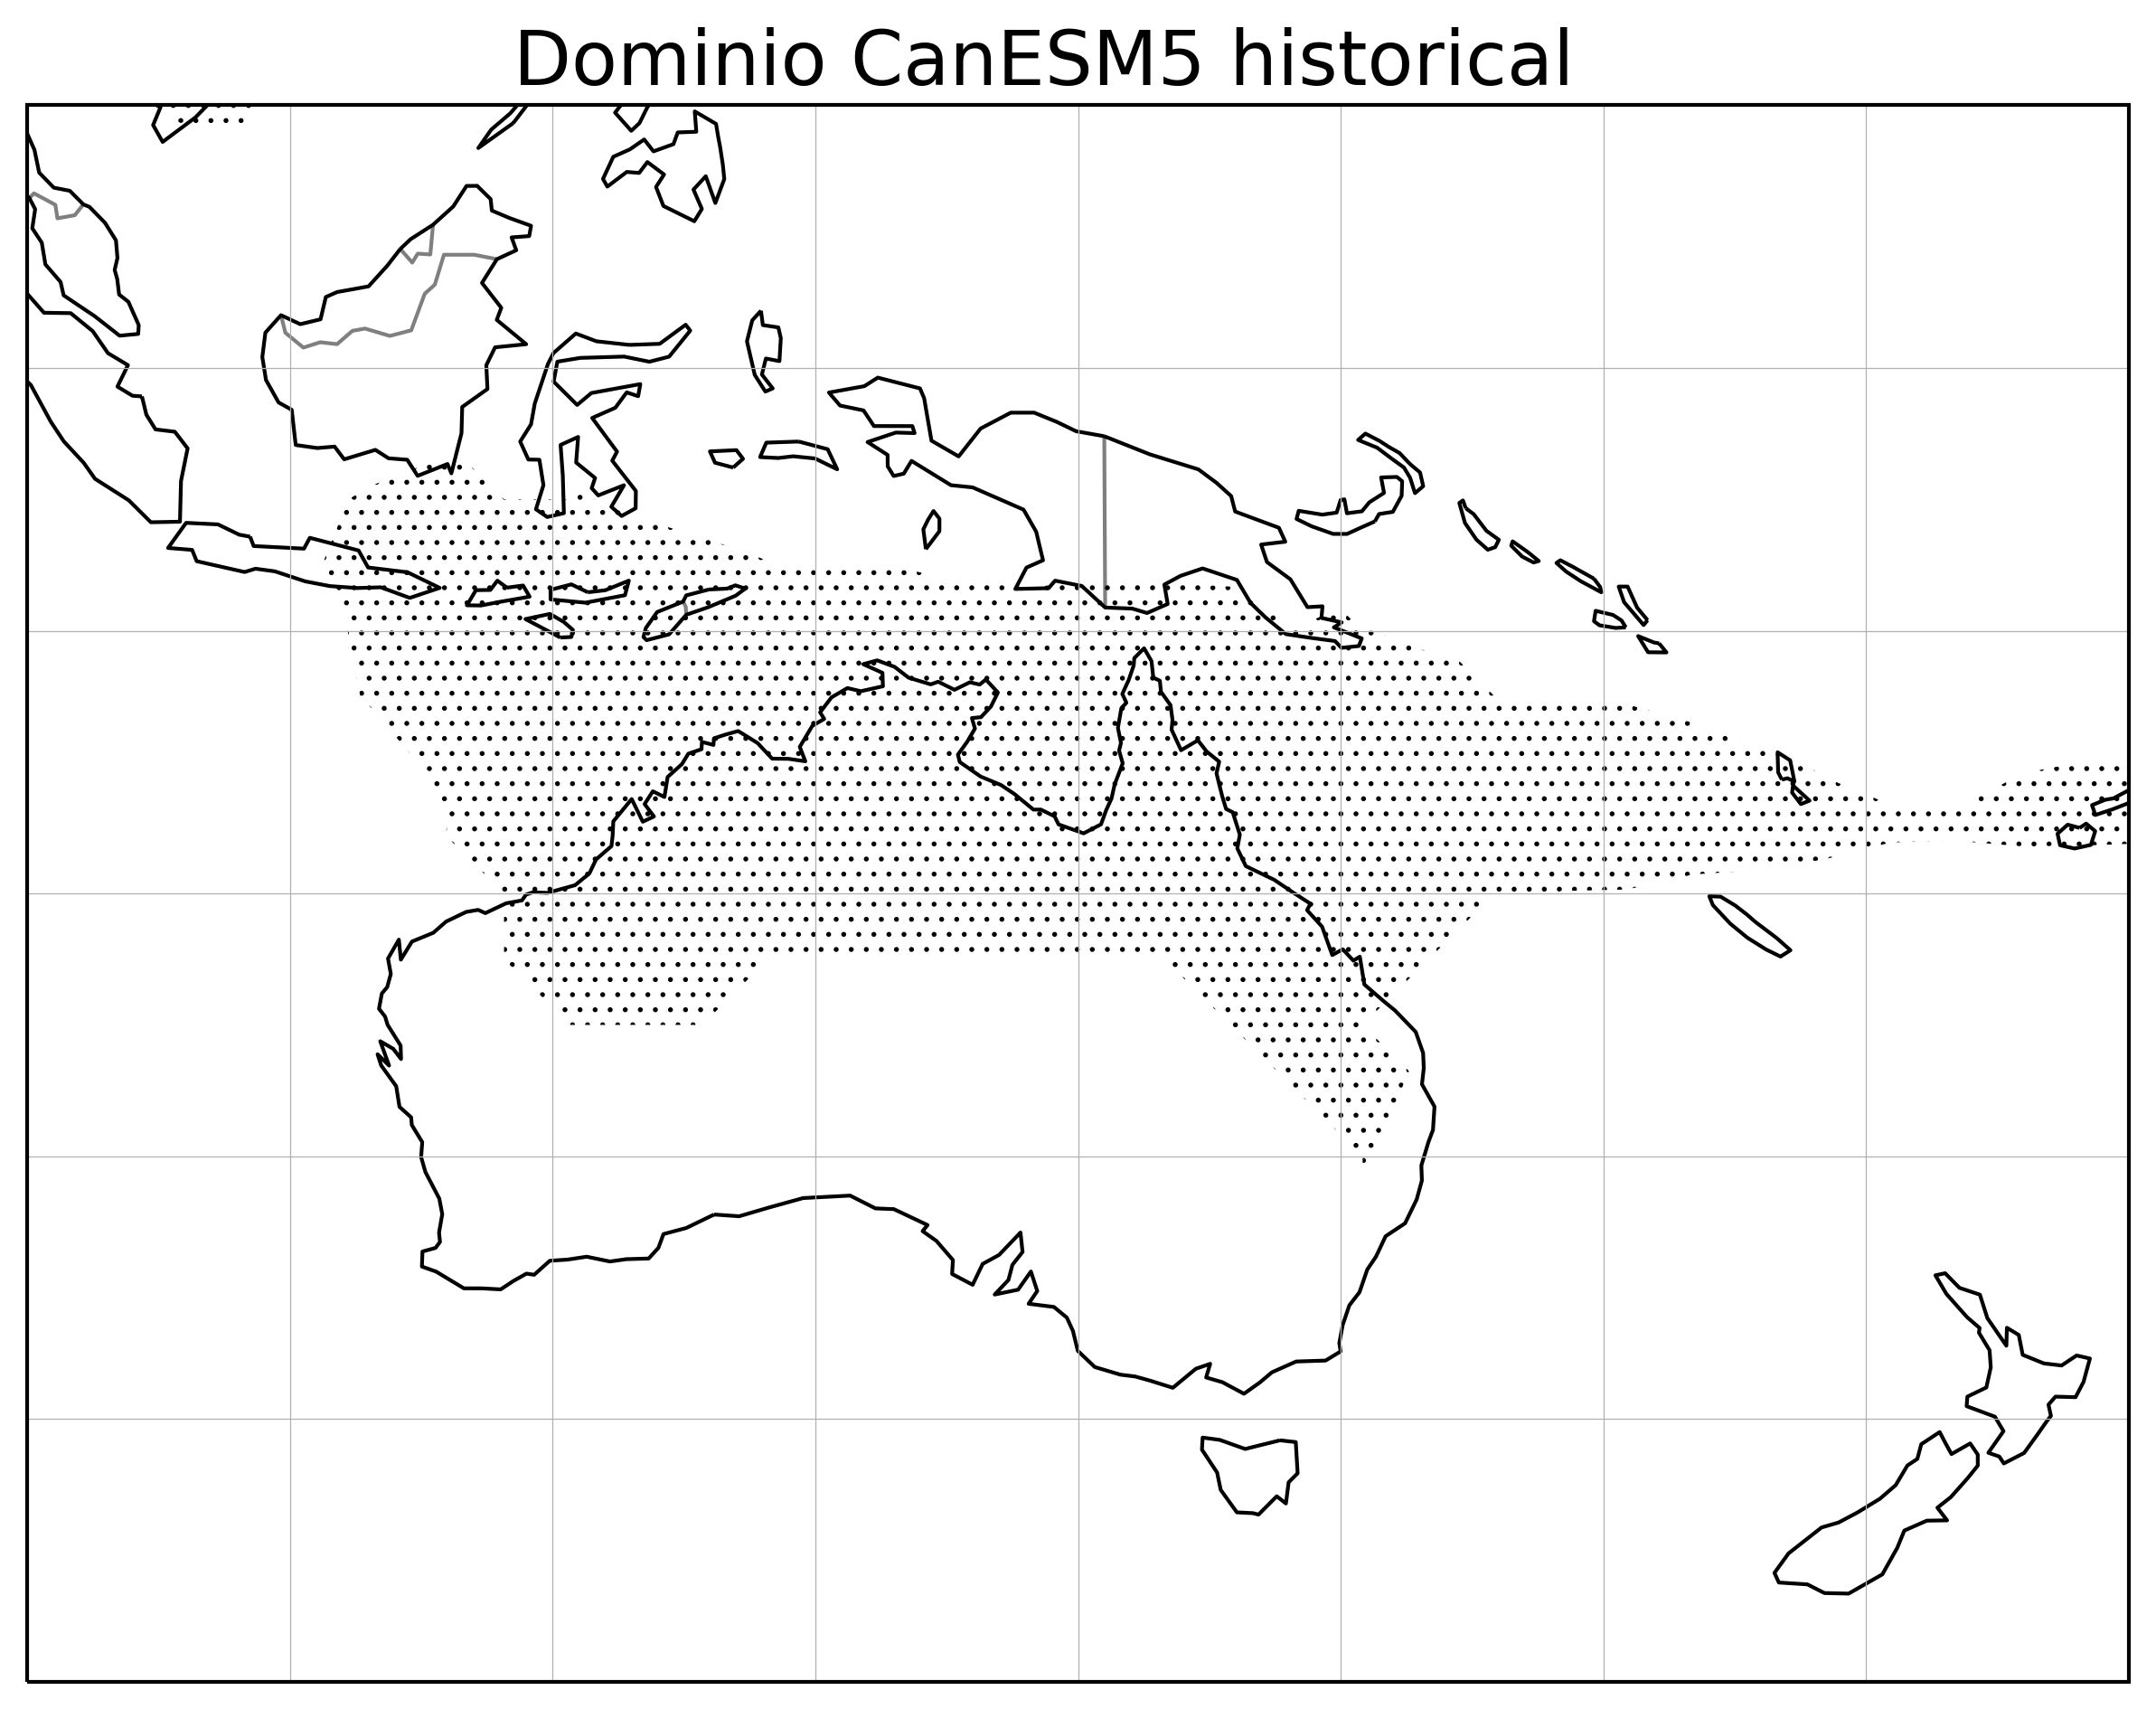

In [22]:
titulo = 'Dominio CanESM5 2070-2099'
clevels = np.arange(0,5,10)
figura = mapa_regional(cyclic_HS_h2,cyclic_HN_h2,titulo)

titulo = 'Dominio CanESM5 2020-2049'
clevels = np.arange(0,5,10)
figura = mapa_regional(cyclic_HS_h1,cyclic_HN_h1,titulo)

titulo = 'Dominio CanESM5 historical'
clevels = np.arange(0,5,10)
figura = mapa_regional(cyclic_HS,cyclic_HN,titulo)